In [50]:
#This notebook will be a whiteboard for my attempt to replicate
#this paper: https://repository.upenn.edu/cgi/viewcontent.cgi?article=1451&context=statistics_papers
#Our focus will be on zero-sum games/metagames, since thats what most my research entails

#Here will construct our aysmmetric matrix from csv file and map it to our action space
import numpy as np
import csv
np.set_printoptions(precision=3, suppress=True)


#This will be our meta_game action space
action_space = []
file = '2019SummerPR.csv'
#We will survey the csv file to fill our action space
with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        if row['Player1'] not in action_space:
            action_space.append(row['Player1'])
        
        if row['Player2'] not in action_space:
            action_space.append(row['Player2'])

#Create action_to_index utility dictionary
index = 0
action_to_index = {}
for action in action_space:
    action_to_index[action] = index
    index += 1

#We will generate our dual variables.. intialize them to 0 and attempt to constuct
#a mixed strategy from it
dual_variables = {}
joint = []
for i in range(len(action_space)):
    for j in range(len(action_space)):
        if j > i:
            #Since this is a meta_game, both players cannot select the same strategy (may not apply to all games)
            joint_action = (action_space[i], action_space[j])
            joint.append(joint_action)
            dual_variables[joint_action] = 0

#print(dual_variables)
print(joint)

[('Hbox', 'Leffen'), ('Hbox', 'Wizzrobe'), ('Hbox', 'Mango'), ('Hbox', 'Axe'), ('Hbox', 'Zain'), ('Hbox', 'Plup'), ('Hbox', 'IBDW'), ('Hbox', 'Amsa'), ('Leffen', 'Wizzrobe'), ('Leffen', 'Mango'), ('Leffen', 'Axe'), ('Leffen', 'Zain'), ('Leffen', 'Plup'), ('Leffen', 'IBDW'), ('Leffen', 'Amsa'), ('Wizzrobe', 'Mango'), ('Wizzrobe', 'Axe'), ('Wizzrobe', 'Zain'), ('Wizzrobe', 'Plup'), ('Wizzrobe', 'IBDW'), ('Wizzrobe', 'Amsa'), ('Mango', 'Axe'), ('Mango', 'Zain'), ('Mango', 'Plup'), ('Mango', 'IBDW'), ('Mango', 'Amsa'), ('Axe', 'Zain'), ('Axe', 'Plup'), ('Axe', 'IBDW'), ('Axe', 'Amsa'), ('Zain', 'Plup'), ('Zain', 'IBDW'), ('Zain', 'Amsa'), ('Plup', 'IBDW'), ('Plup', 'Amsa'), ('IBDW', 'Amsa')]


In [51]:
#Here will construct our aysmmetric matrix from csv file and map it to our action space
import numpy as np
import csv
np.set_printoptions(precision=3, suppress=True)

with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    #Create two dictionaries to keep track of wins and losses over matches
    matches = []
    wins_i = {}
    wins_j = {}
    
    for row in csv_reader:
        i = row["Player1"]
        j = row["Player2"]
        match = (i, j)
        matchPrime = (j, i)
        win_i = float(row["Wins"])
        win_j = float(row["Loss"])
        
        if (i in action_space) and (j in action_space):
            if (match in matches) or (matchPrime in matches):
                if match in matches:
                    wins_i[match] += win_i
                    wins_j[match] += win_j
                else:
                    wins_i[matchPrime] += win_j
                    wins_j[matchPrime] += win_i
            else:
                matches.append(match)
                wins_i[match] = win_i
                wins_j[match] = win_j

#Create payoff matrix
M = np.full((len(action_space), len(action_space)), 0.5)
for match, win_i in wins_i.items():
    win_j = wins_j[match]
    payout = win_i/(win_i + win_j)
    print(match, ": ", payout)
    name_i, name_j = match
    
    #Soften payout
    epsilon = 0.01
    if payout == 0.0:
        payout += epsilon
    elif payout == 1.0:
        payout -= epsilon
    
    M[action_to_index[name_i]][action_to_index[name_j]] = payout
    M[action_to_index[name_j]][action_to_index[name_i]] = 1 - payout

#Before logit space
print(M)
#Create logit space
M = np.log(M/(1-M))
print(M)

('Hbox', 'Leffen') :  0.3333333333333333
('Hbox', 'Wizzrobe') :  0.0
('Hbox', 'Mango') :  0.6666666666666666
('Hbox', 'Axe') :  1.0
('Wizzrobe', 'Axe') :  0.25
('Wizzrobe', 'Leffen') :  1.0
('Mango', 'Axe') :  0.6666666666666666
('Mango', 'Leffen') :  0.5
('Mango', 'Wizzrobe') :  1.0
('Axe', 'Leffen') :  0.6666666666666666
('Zain', 'Wizzrobe') :  0.0
('Zain', 'Plup') :  0.25
('Zain', 'Axe') :  0.0
('Zain', 'Mango') :  0.0
('Zain', 'Leffen') :  0.0
('Zain', 'Hbox') :  0.6666666666666666
('Plup', 'Hbox') :  0.0
('Plup', 'Mango') :  0.0
('Plup', 'Wizzrobe') :  1.0
('Plup', 'Leffen') :  0.0
('Plup', 'Axe') :  0.0
('IBDW', 'Hbox') :  0.5
('IBDW', 'Mango') :  0.5
('IBDW', 'Wizzrobe') :  0.0
('IBDW', 'Axe') :  0.0
('IBDW', 'Leffen') :  0.0
('IBDW', 'Plup') :  0.0
('IBDW', 'Zain') :  0.0
('Amsa', 'Wizzrobe') :  0.0
('Amsa', 'Leffen') :  0.0
('Amsa', 'Hbox') :  1.0
('Amsa', 'Zain') :  0.0
('Amsa', 'Mango') :  1.0
('Amsa', 'Axe') :  0.0
('Amsa', 'Plup') :  0.0
('Amsa', 'IBDW') :  0.0
[[0.5   0.3

In [68]:
def payoff(action_1, action_2):
    return M[action_to_index[action_1]][action_to_index[action_2]]

def payoff_gain(alt_action, action, maximum=False, positive=True):
    #Calculate M(alt_action, action') & M(action, action')
    diff = 0 
    for action_prime in action_space:
        if action_prime is not action:
            M_alt = payoff(alt_action, action_prime)
            M_act = payoff(action, action_prime)
            if maximum:     
                if positive:
                    diff += max(0, M_alt - M_act)
                else:
                    diff += max(0, -(M_alt - M_act))
            else: 
                diff += M_alt - M_act
    
    return diff

#Return Z(lambda) of dual variables
def Z(dv):
    sum_one = 0
    for i in range(len(action_space)):
        action = action_space[i]
        sum_two = 0
        for j in range(len(action_space)):
            action_prime = action_space[j]
            if j > i:
                sum_two += dv[(action, action_prime)] * payoff_gain(action_prime, action)
        sum_one += np.exp(-sum_two)
    return sum_one

#Get mixed strategy from dual variables
def P(dv, a):
    sum_one = 0
    for pair in joint:
        a1, a2 = pair
        if a == a1:
            sum_one += dv[pair]*payoff_gain(a2, a)
        elif a == a2:
            sum_one += dv[pair]*payoff_gain(a1, a)
    
    log_P = -sum_one - np.log(Z(dv))
    return np.exp(log_P)
    

In [69]:
#Test our functions
print(payoff("Wizzrobe", "Hbox"))
print(payoff_gain("Wizzrobe", "Hbox"))
print(P(dual_variables, "Wizzrobe"))

4.595119850134589
13.379894442295603
0.11111111111111109


In [70]:
def regret_pos(dv, action, action_prime):
    P_a = P(dv, action)
    final_sum = 0
    for p2_action in action_space:
        P_p2 = P(dv, p2_action)
        p_gain = payoff(action_prime, p2_action) - payoff(action, p2_action)
        
        final_sum += (P_a*P_p2) * max(0, p_gain)
        
    return final_sum
            
def regret_neg(dv, action, action_prime):
    P_a = P(dv, action)
    final_sum = 0
    for p2_action in action_space:
        P_p2 = P(dv, p2_action)
        p_gain = payoff(action_prime, p2_action) - payoff(action, p2_action)
        
        final_sum += (P_a*P_p2) * max(0, -p_gain)
        
    return final_sum

def regret_both(dv, action, action_prime):
    P_a = P(dv, action)
    p = 0
    n = 0
    for p2_action in action_space:
        P_p2 = P(dv, p2_action)
        p_gain = payoff(action_prime, p2_action) - payoff(action, p2_action)
        
        p += (P_a*P_p2) * max(0, p_gain)
        n += (P_a*P_p2) * max(0, -p_gain)
        
    return p, n

In [71]:
print(regret_pos(dual_variables, "Hbox", "Wizzrobe"))
print(regret_neg(dual_variables, "Hbox", "Wizzrobe"))
print(regret_both(dual_variables, "Hbox", "Wizzrobe"))

0.4142238680501482
0.24903998604649882
(0.4142238680501482, 0.24903998604649882)


In [72]:
def abs_gain(action, action_prime):
    total = 0
    for p2_action in action_space:
        p_gain = abs(payoff(action_prime, p2_action) - payoff(action, p2_action))
        total += p_gain
    
    return total
        
def lower_bound_c():
    bound = 0
    for action in action_space:
        for action_prime in action_space:
            a_gain = abs_gain(action, action_prime)
            if a_gain > bound:
                bound = a_gain
    return bound 

In [73]:
print(abs_gain("Wizzrobe", "Mango"))
print(lower_bound_c())

43.84098530099931
62.22146470153765


In [74]:
from tqdm import tqdm 

def sort_dictionary(d):
    sorted_x = sorted(d.items(), key=lambda kv: kv[1])
    return sorted_x

def plot(dv):
    probs = {}
    for action in action_space:
        probs[action] = P(dv,action)
    
    import matplotlib.pyplot as plt; plt.rcdefaults()
    import numpy as np
    import matplotlib.pyplot as plt

    sort = sort_dictionary(probs)
    #For tier lists
    objects = []
    performance = []
    for player, value in sort:
        objects.append(player)
        performance.append(value)


    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align="center")
    plt.yticks(y_pos, objects)
    plt.xlabel('Density')
    plt.ylabel('Strategies')
    plt.title('Maximum Entropy Nash Distribution')

    plt.show()
    
def log_grad_descent(dv, rounds=10, verbose=True):
    c = lower_bound_c()
    
    for it in tqdm(range(rounds)):
        step_dict = {}
        for pair in joint:
            """
            r_pos = regret_pos(dv, action, action_prime)
            r_neg = regret_neg(dv, action, action_prime)
            """
            
            a1, a2 = pair
            r_pos, r_neg = regret_both(dv, a1, a2)

            #print("Joint Action: ", (action, action_prime))
            #print("r_pos: ", r_pos)
            #print("r_neg: ", r_neg)

            term = ((r_pos)/(r_pos + r_neg)) - (1/2)


            step = (1/c)*term

            step_dict[pair] = step
                
        for pair in joint:
            dv[pair] = max(0, dv[pair] + step_dict[pair])
                
        if verbose:
            print("Iteration ", it)
            plot(dv)



  0%|          | 0/100 [00:00<?, ?it/s]

Iteration  0


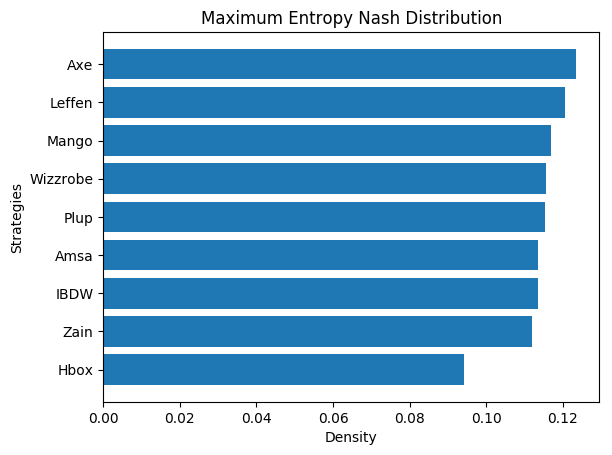



  1%|          | 1/100 [00:00<00:43,  2.26it/s]

Iteration  1


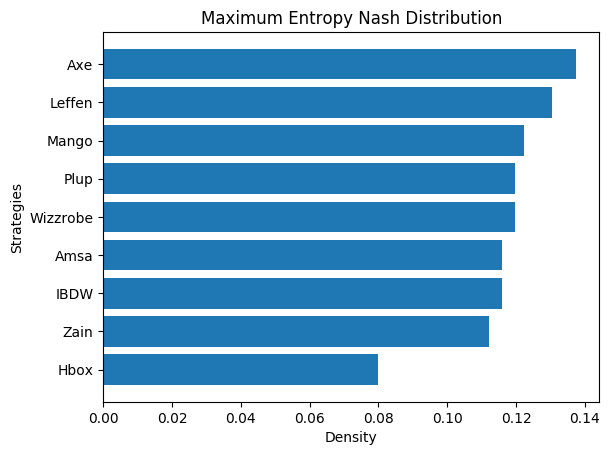



  2%|▏         | 2/100 [00:00<00:43,  2.26it/s]

Iteration  2


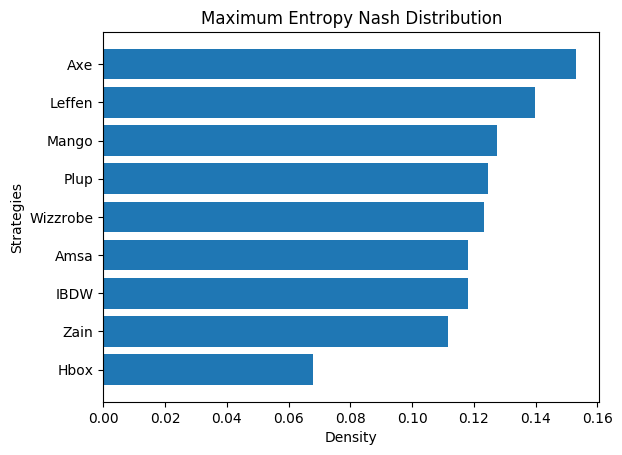



  3%|▎         | 3/100 [00:01<00:42,  2.27it/s]

Iteration  3


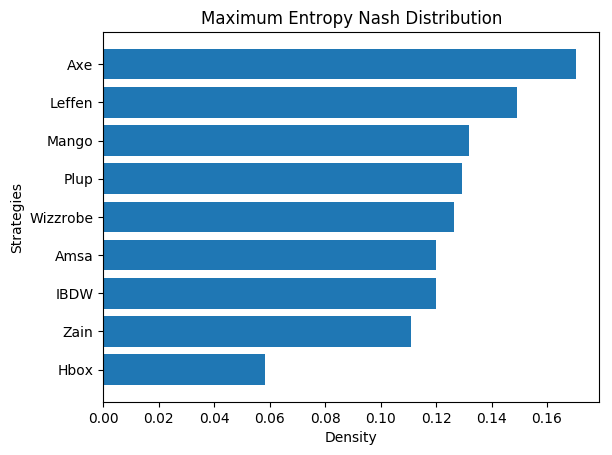



  4%|▍         | 4/100 [00:01<00:42,  2.25it/s]

Iteration  4


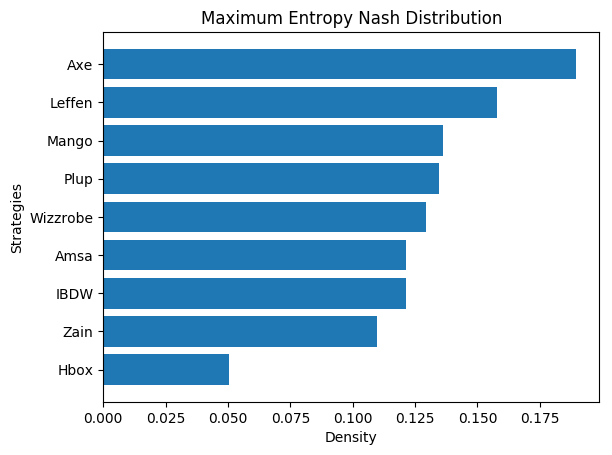



  5%|▌         | 5/100 [00:02<00:43,  2.16it/s]

Iteration  5


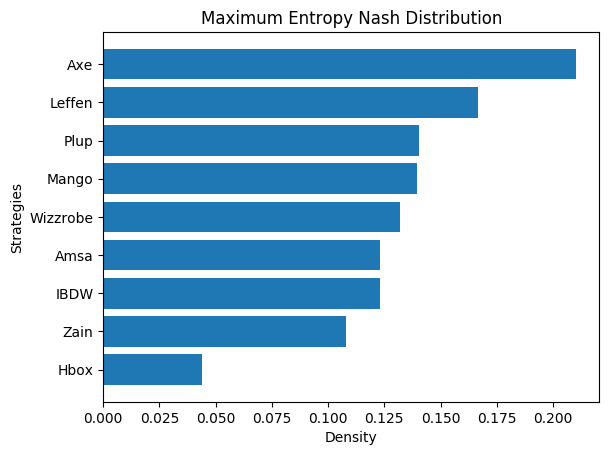



  6%|▌         | 6/100 [00:02<00:43,  2.14it/s]

Iteration  6


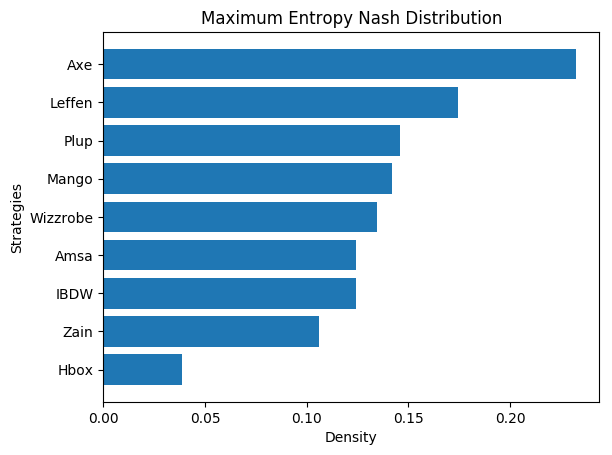



  7%|▋         | 7/100 [00:03<00:45,  2.04it/s]

Iteration  7


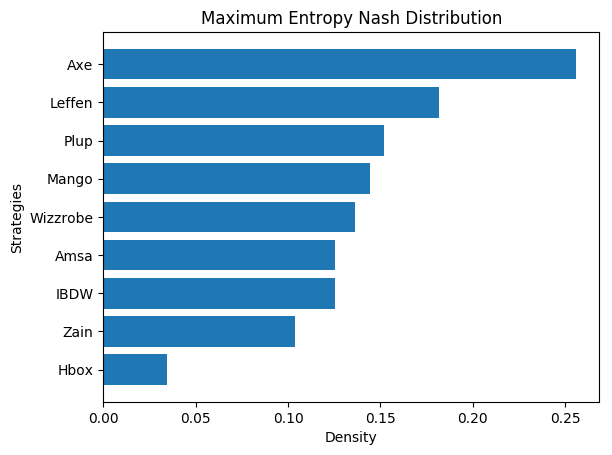



  8%|▊         | 8/100 [00:03<00:46,  1.99it/s]

Iteration  8


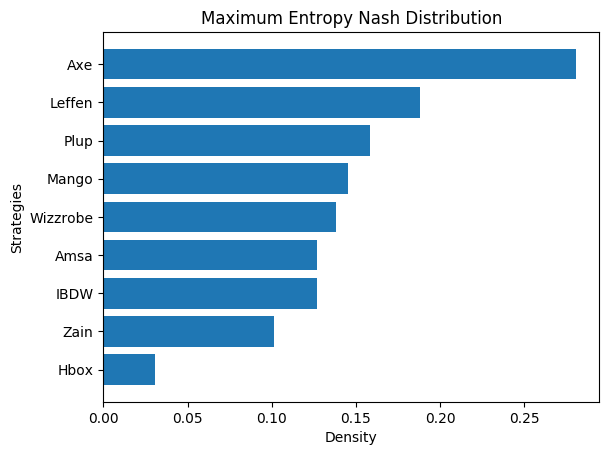



  9%|▉         | 9/100 [00:04<00:44,  2.02it/s]

Iteration  9


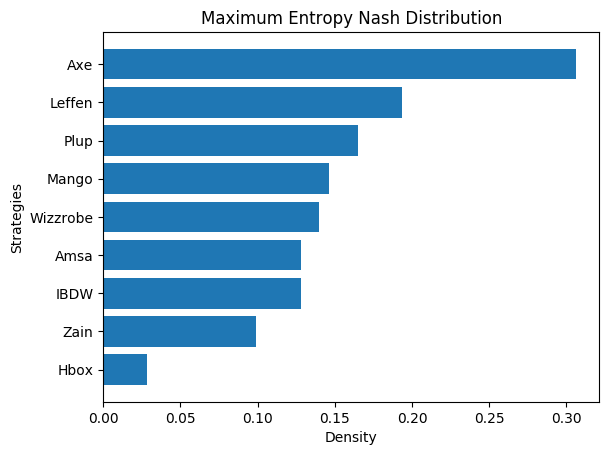



 10%|█         | 10/100 [00:04<00:45,  1.96it/s]

Iteration  10


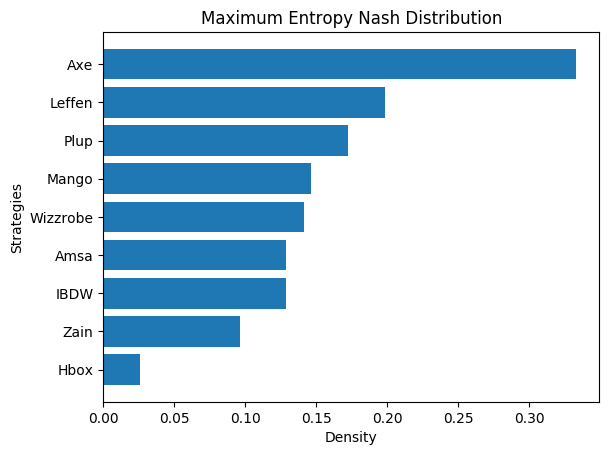



 11%|█         | 11/100 [00:05<00:44,  2.00it/s]

Iteration  11


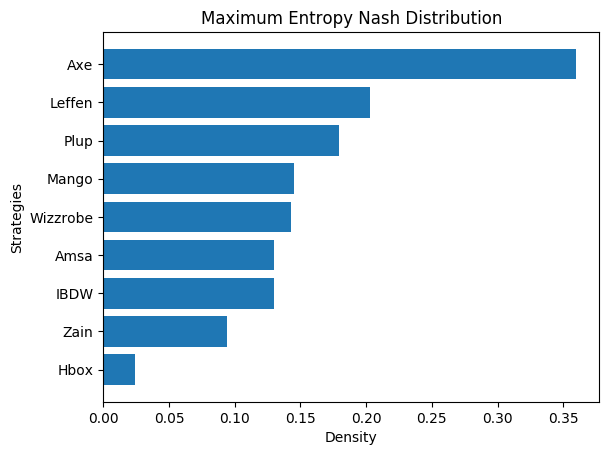



 12%|█▏        | 12/100 [00:05<00:44,  1.98it/s]

Iteration  12


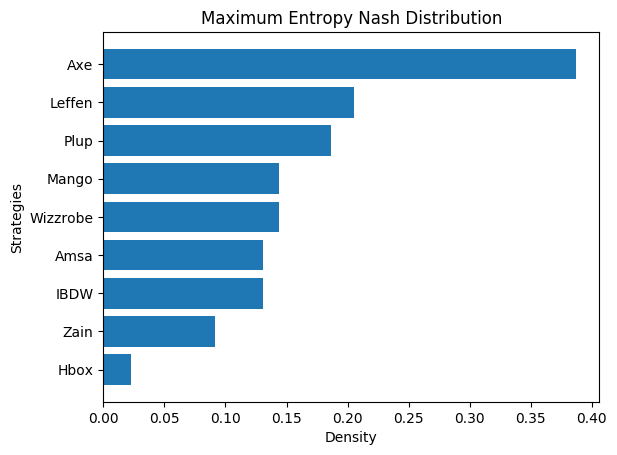



 13%|█▎        | 13/100 [00:06<00:42,  2.02it/s]

Iteration  13


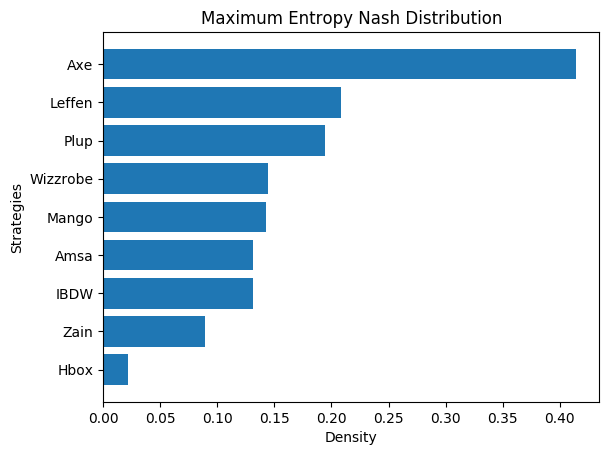



 14%|█▍        | 14/100 [00:06<00:42,  2.01it/s]

Iteration  14


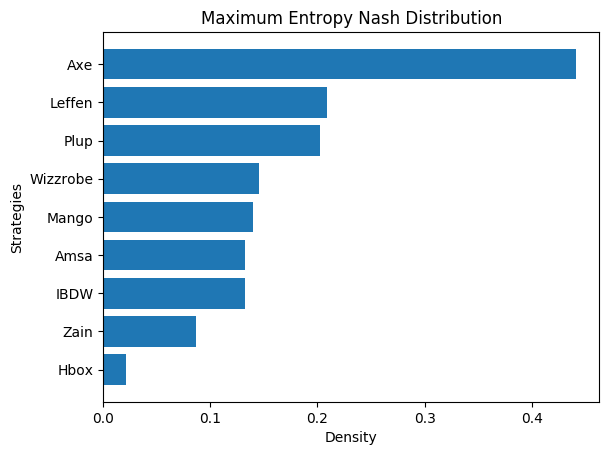



 15%|█▌        | 15/100 [00:07<00:42,  2.02it/s]

Iteration  15


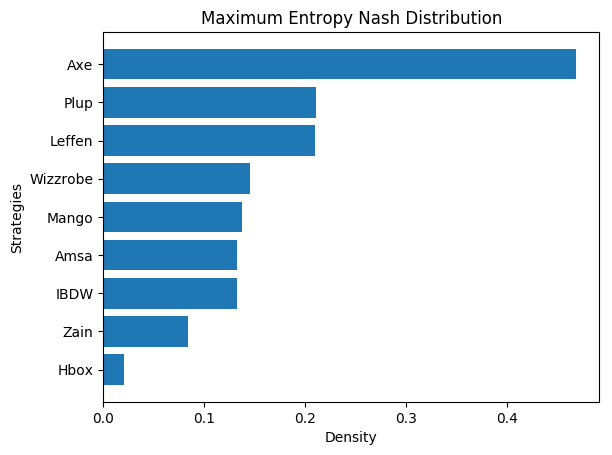



 16%|█▌        | 16/100 [00:07<00:42,  1.97it/s]

Iteration  16


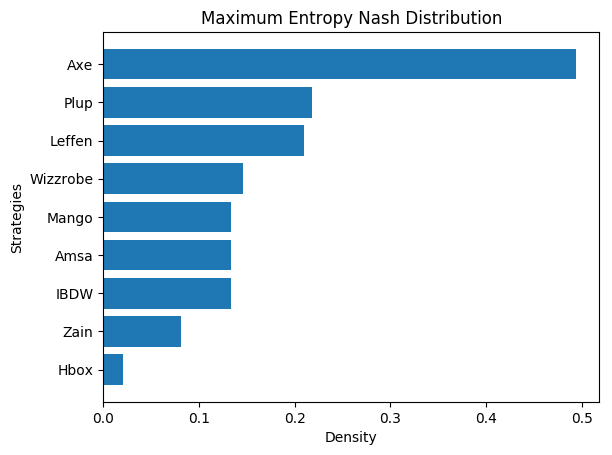



 17%|█▋        | 17/100 [00:08<00:42,  1.97it/s]

Iteration  17


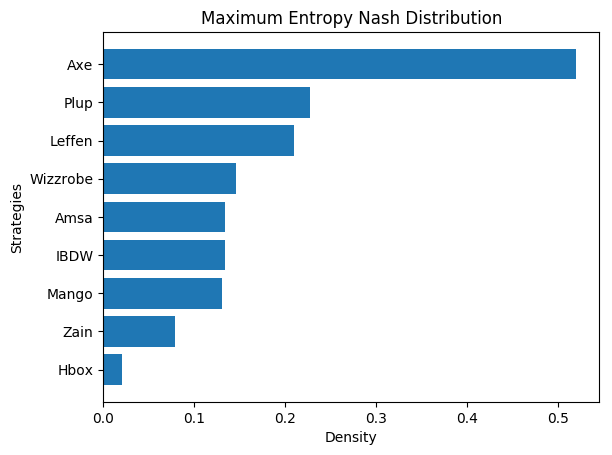



 18%|█▊        | 18/100 [00:08<00:41,  2.00it/s]

Iteration  18


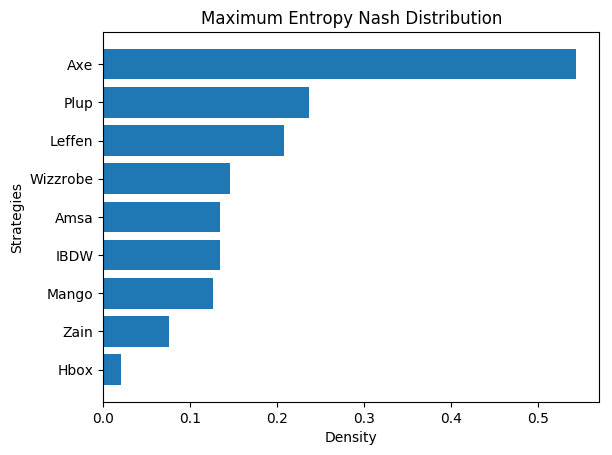



 19%|█▉        | 19/100 [00:09<00:41,  1.97it/s]

Iteration  19


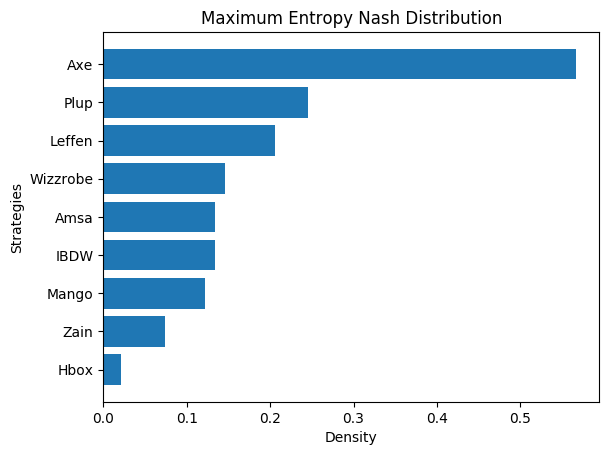



 20%|██        | 20/100 [00:09<00:40,  2.00it/s]

Iteration  20


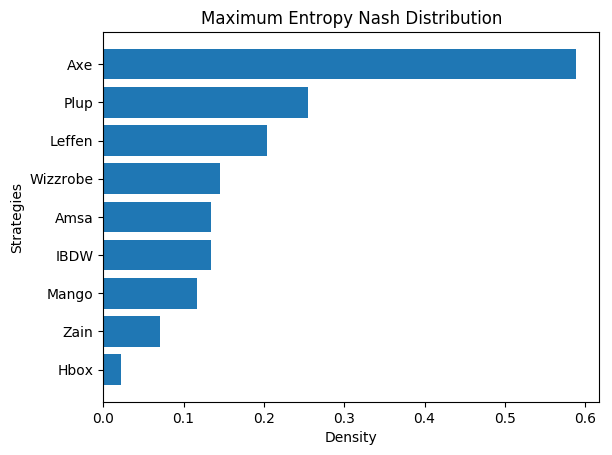



 21%|██        | 21/100 [00:10<00:38,  2.03it/s]

Iteration  21


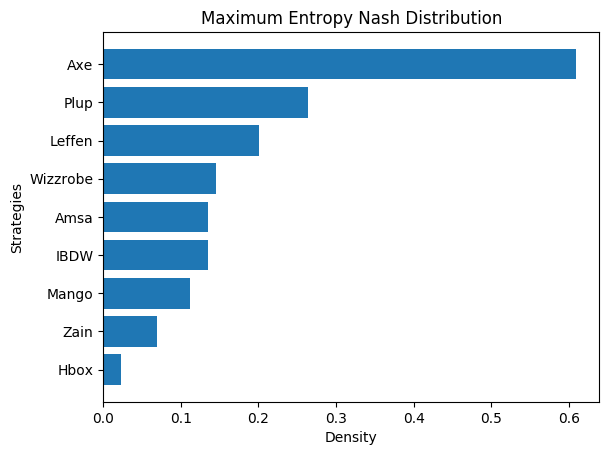



 22%|██▏       | 22/100 [00:10<00:38,  2.04it/s]

Iteration  22


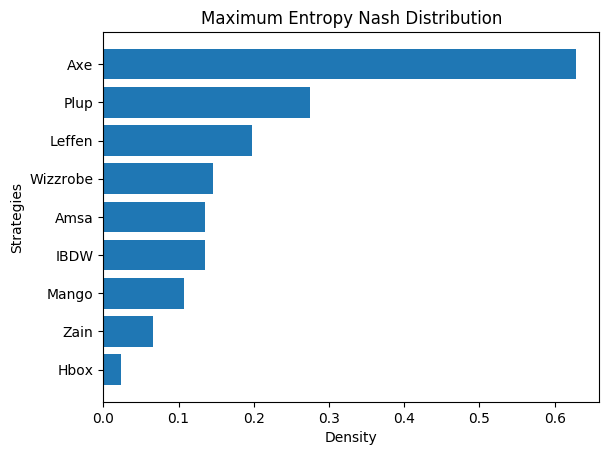



 23%|██▎       | 23/100 [00:11<00:38,  2.02it/s]

Iteration  23


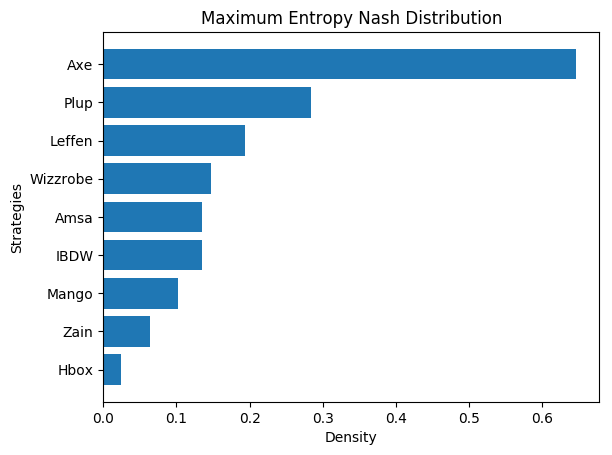



 24%|██▍       | 24/100 [00:11<00:37,  2.00it/s]

Iteration  24


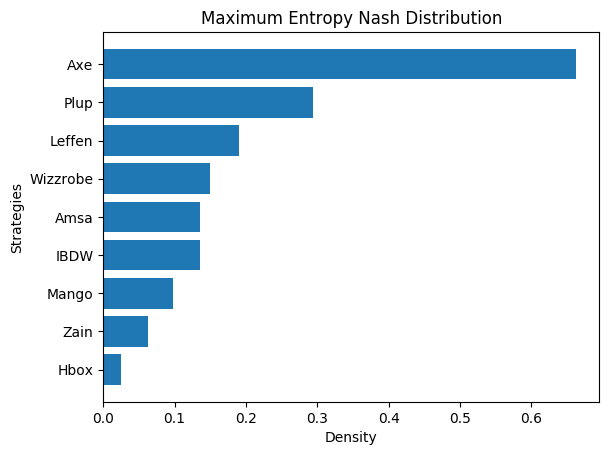



 25%|██▌       | 25/100 [00:12<00:42,  1.78it/s]

Iteration  25


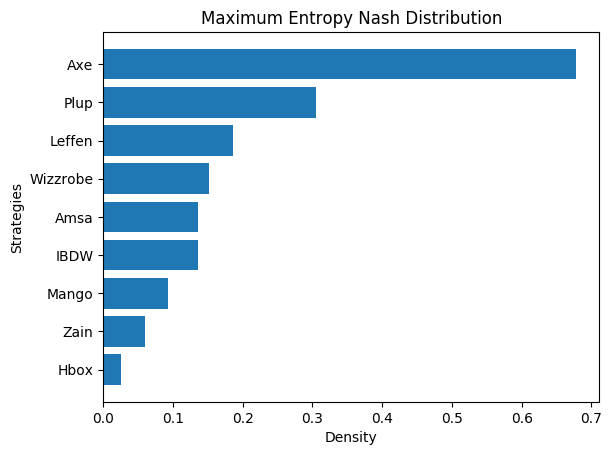



 26%|██▌       | 26/100 [00:13<00:39,  1.86it/s]

Iteration  26


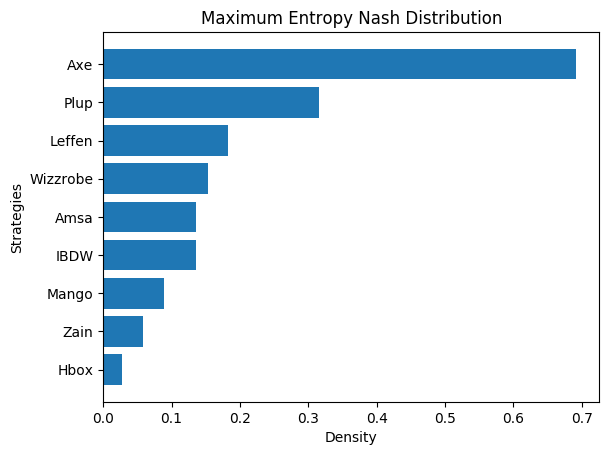



 27%|██▋       | 27/100 [00:13<00:39,  1.83it/s]

Iteration  27


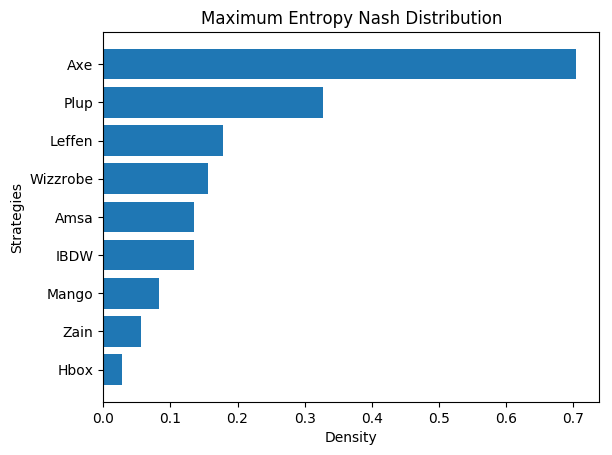



 28%|██▊       | 28/100 [00:14<00:38,  1.89it/s]

Iteration  28


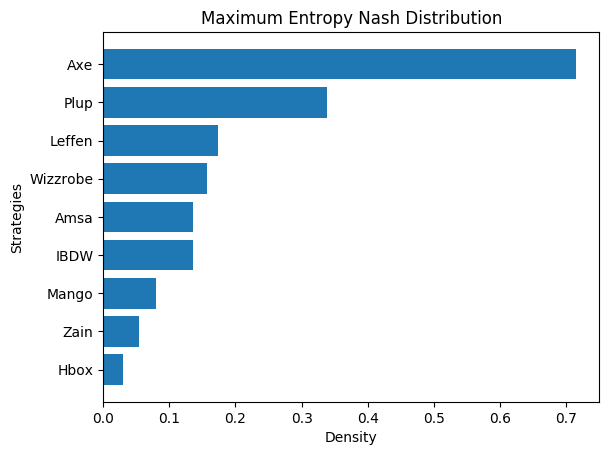



 29%|██▉       | 29/100 [00:14<00:36,  1.93it/s]

Iteration  29


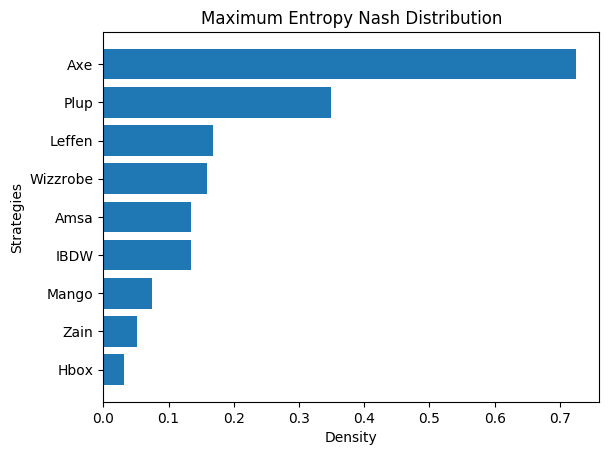



 30%|███       | 30/100 [00:15<00:38,  1.84it/s]

Iteration  30


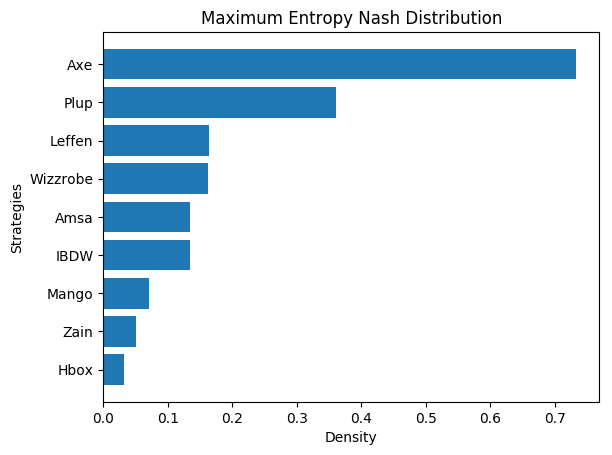



 31%|███       | 31/100 [00:15<00:36,  1.88it/s]

Iteration  31


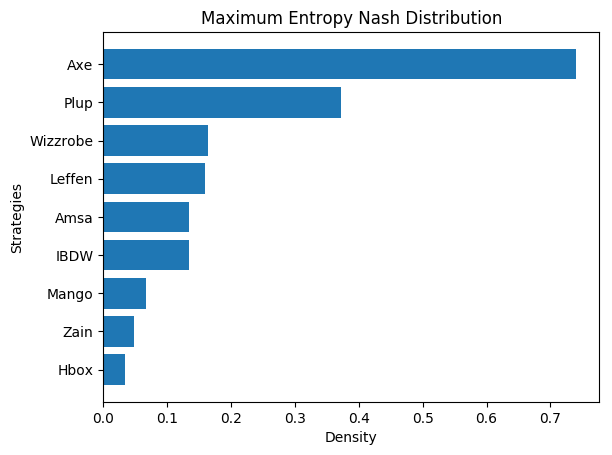



 32%|███▏      | 32/100 [00:16<00:37,  1.82it/s]

Iteration  32


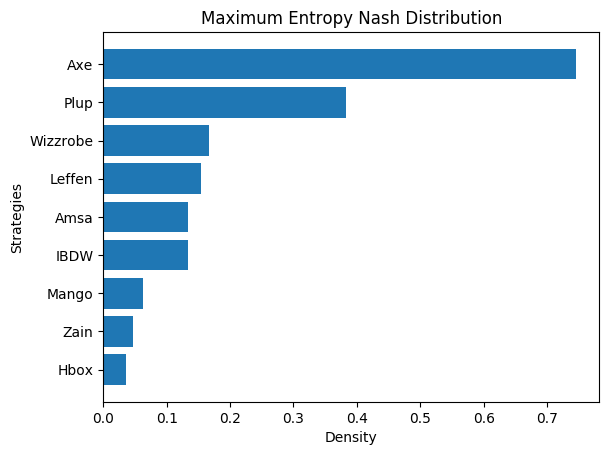



 33%|███▎      | 33/100 [00:16<00:36,  1.84it/s]

Iteration  33


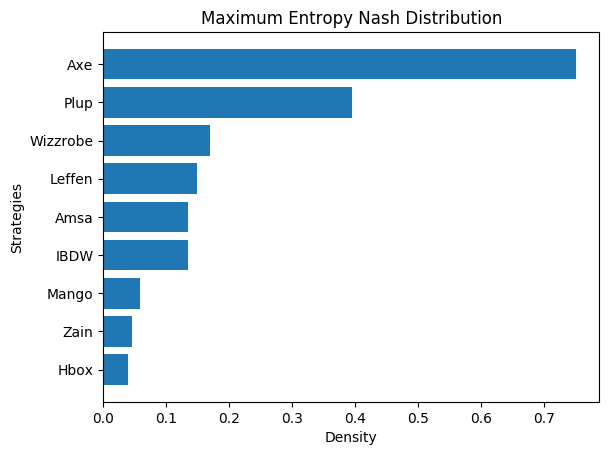



 34%|███▍      | 34/100 [00:17<00:35,  1.85it/s]

Iteration  34


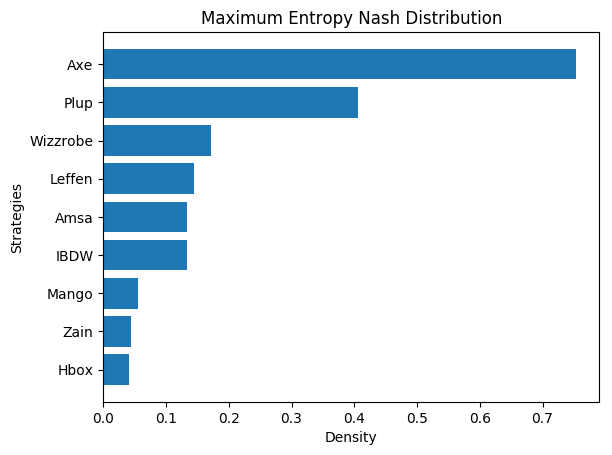



 35%|███▌      | 35/100 [00:17<00:36,  1.79it/s]

Iteration  35


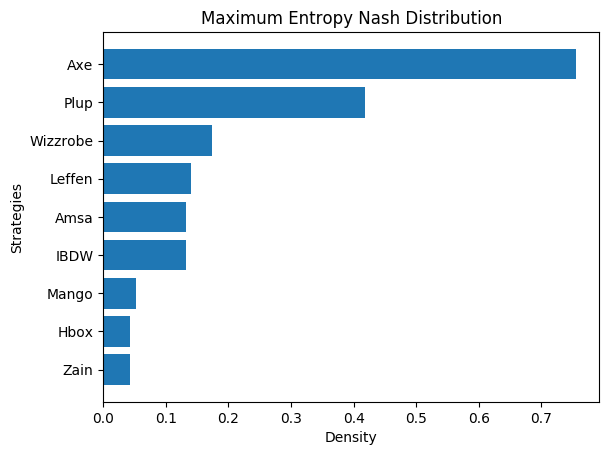



 36%|███▌      | 36/100 [00:18<00:36,  1.77it/s]

Iteration  36


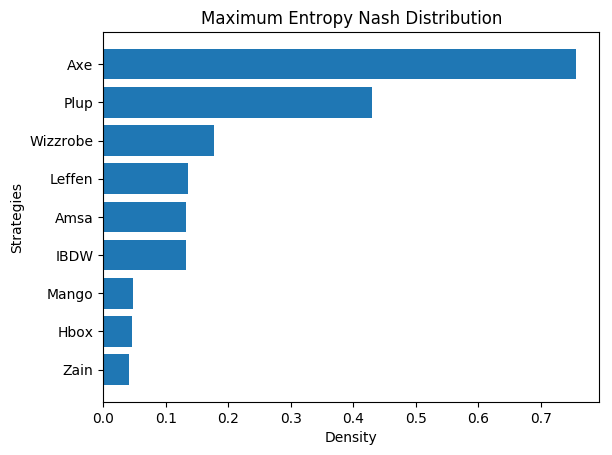



 37%|███▋      | 37/100 [00:19<00:36,  1.74it/s]

Iteration  37


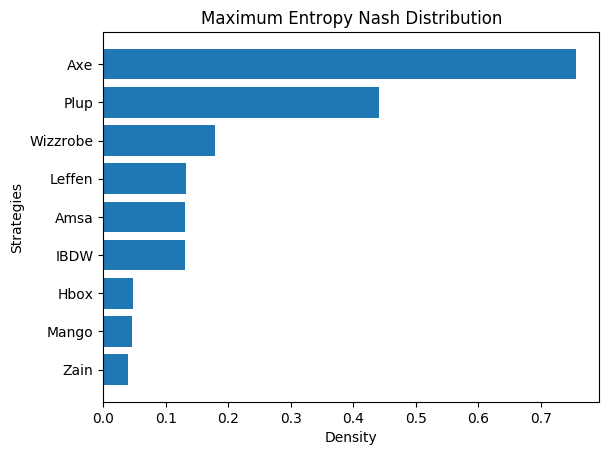



 38%|███▊      | 38/100 [00:19<00:36,  1.72it/s]

Iteration  38


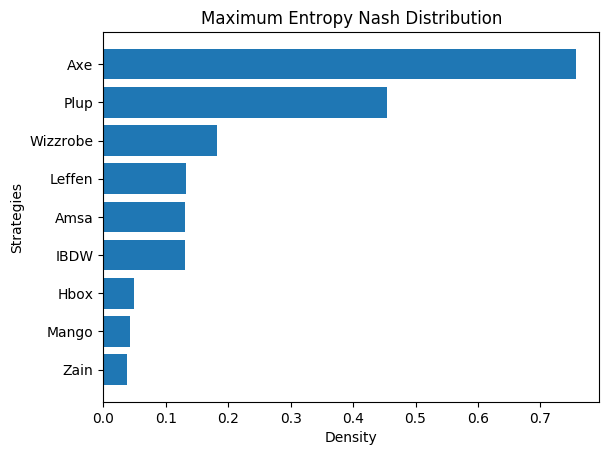



 39%|███▉      | 39/100 [00:20<00:33,  1.82it/s]

Iteration  39


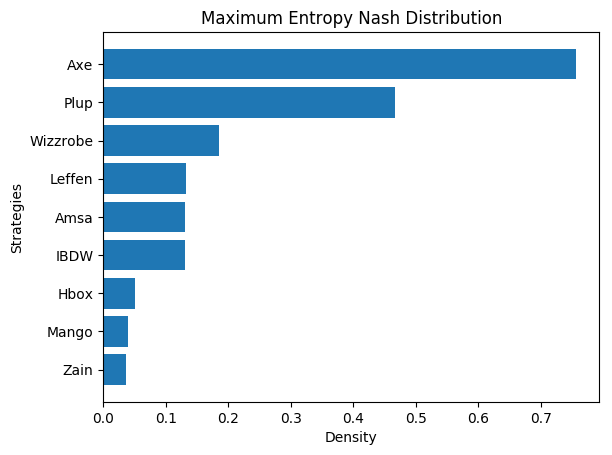



 40%|████      | 40/100 [00:20<00:31,  1.90it/s]

Iteration  40


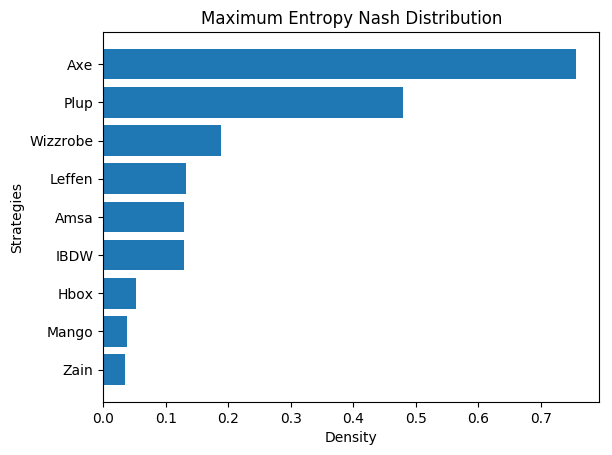



 41%|████      | 41/100 [00:21<00:32,  1.84it/s]

Iteration  41


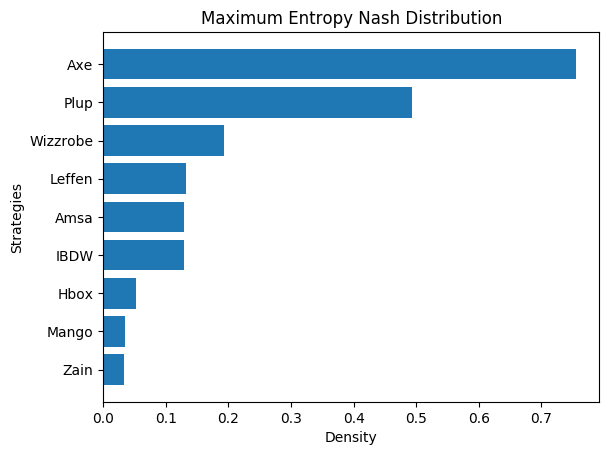



 42%|████▏     | 42/100 [00:21<00:30,  1.88it/s]

Iteration  42


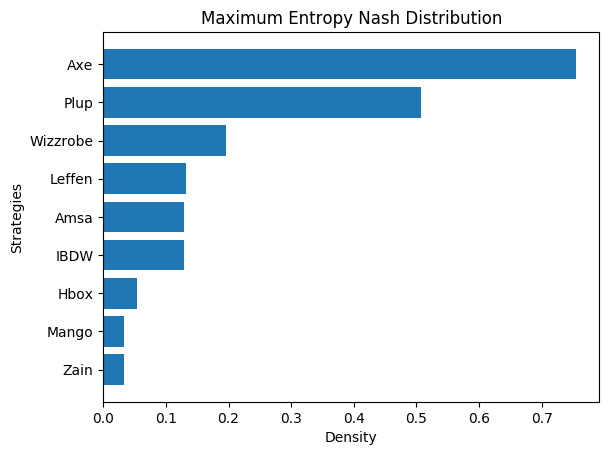



 43%|████▎     | 43/100 [00:22<00:29,  1.92it/s]

Iteration  43


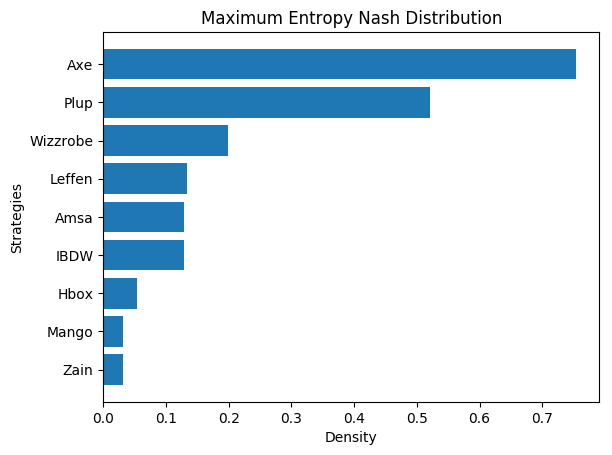



 44%|████▍     | 44/100 [00:22<00:29,  1.93it/s]

Iteration  44


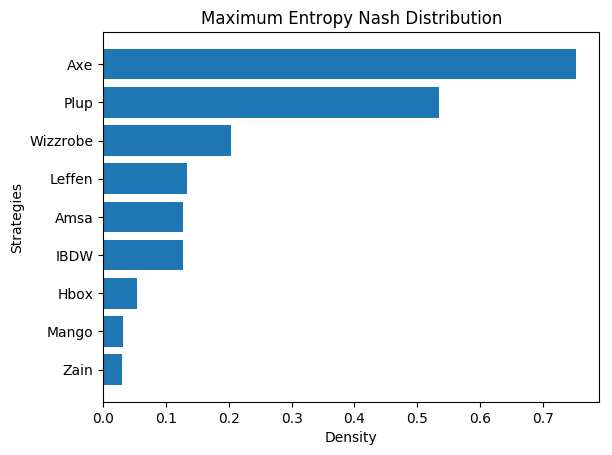



 45%|████▌     | 45/100 [00:23<00:28,  1.90it/s]

Iteration  45


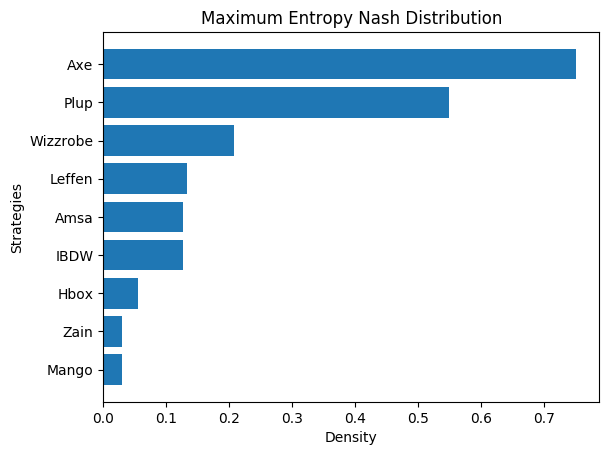



 46%|████▌     | 46/100 [00:23<00:27,  1.97it/s]

Iteration  46


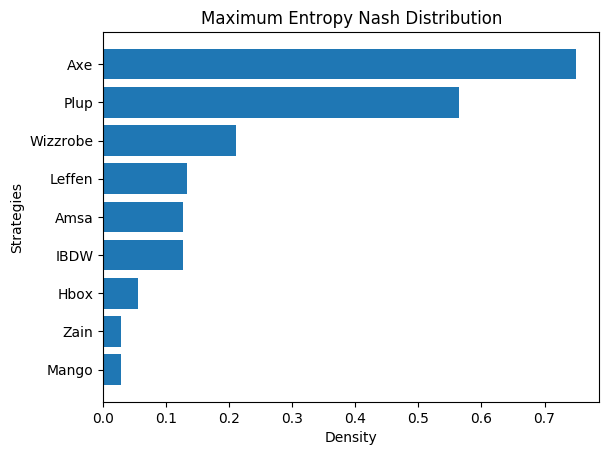



 47%|████▋     | 47/100 [00:24<00:27,  1.95it/s]

Iteration  47


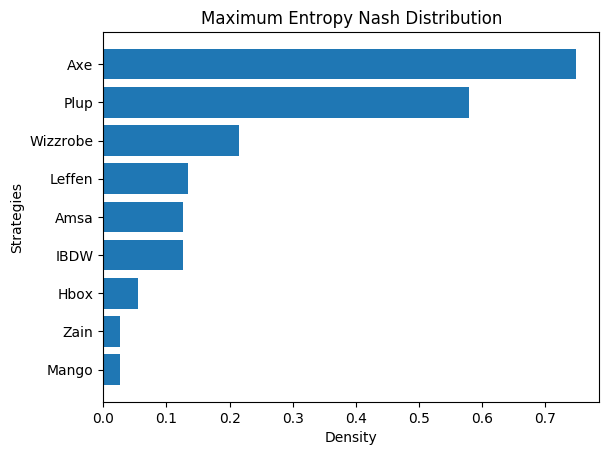



 48%|████▊     | 48/100 [00:24<00:25,  2.02it/s]

Iteration  48


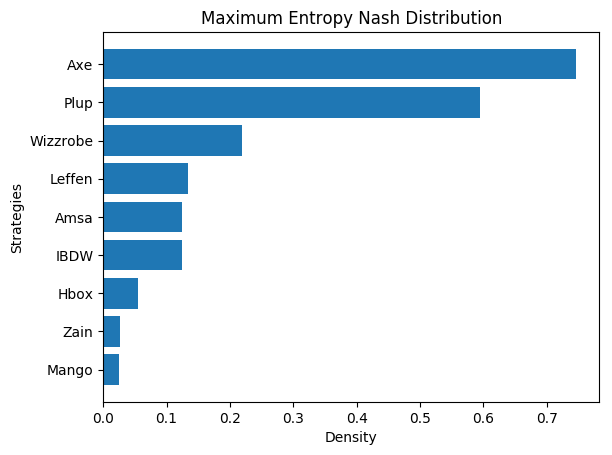



 49%|████▉     | 49/100 [00:25<00:26,  1.94it/s]

Iteration  49


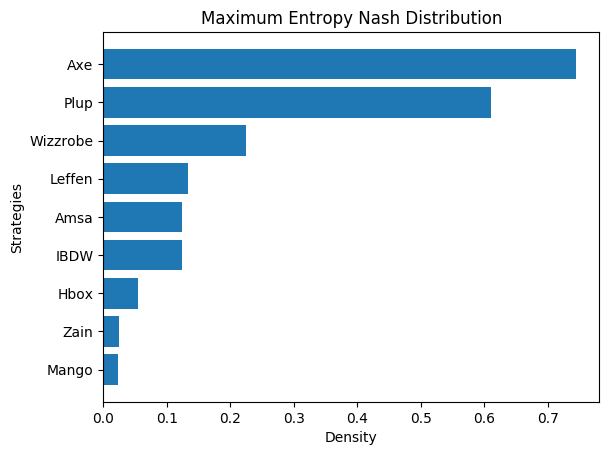



 50%|█████     | 50/100 [00:25<00:26,  1.90it/s]

Iteration  50


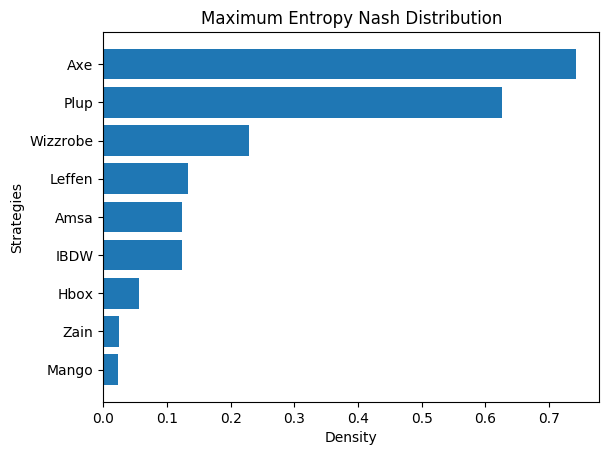



 51%|█████     | 51/100 [00:26<00:26,  1.85it/s]

Iteration  51


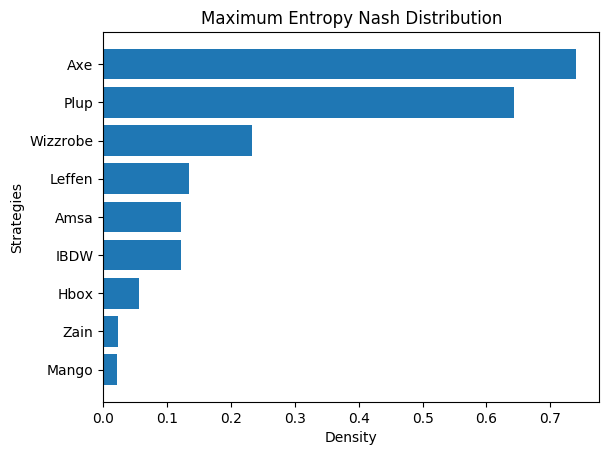



 52%|█████▏    | 52/100 [00:27<00:27,  1.77it/s]

Iteration  52


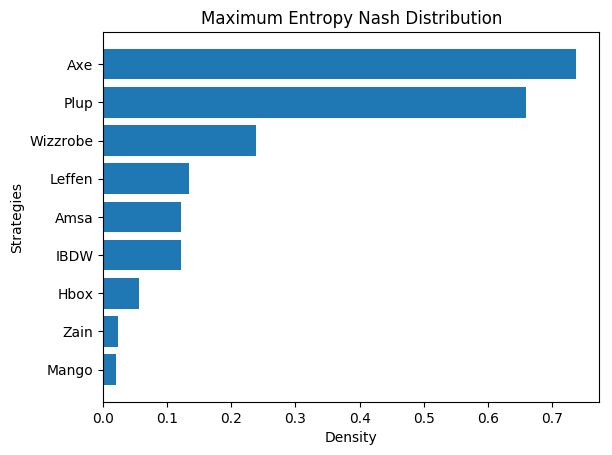



 53%|█████▎    | 53/100 [00:27<00:26,  1.79it/s]

Iteration  53


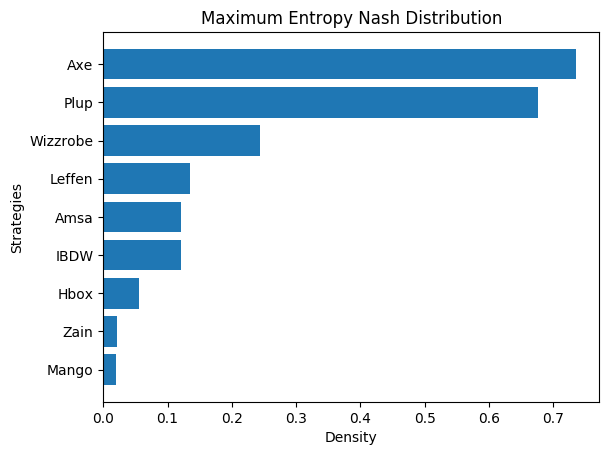



 54%|█████▍    | 54/100 [00:28<00:24,  1.85it/s]

Iteration  54


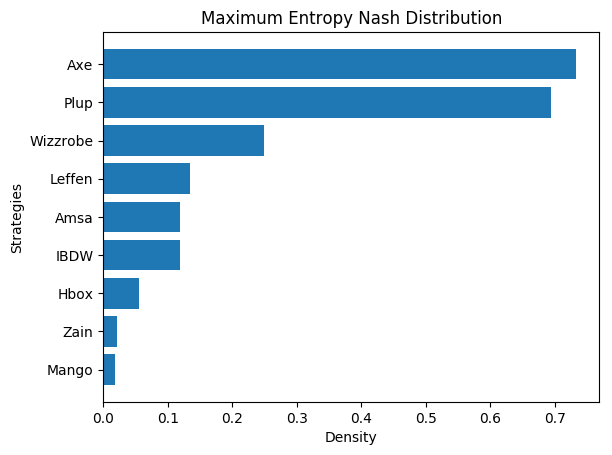



 55%|█████▌    | 55/100 [00:28<00:25,  1.74it/s]

Iteration  55


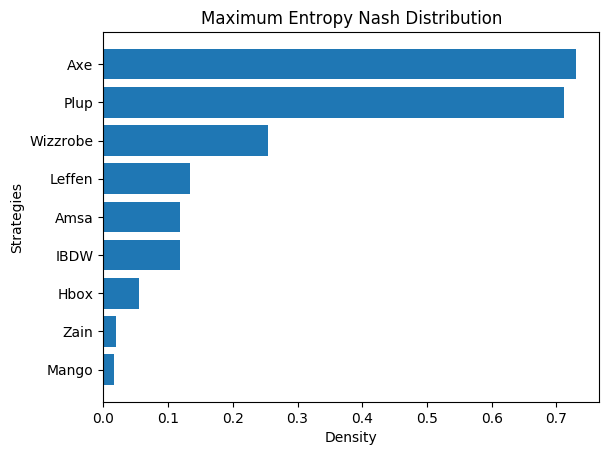



 56%|█████▌    | 56/100 [00:29<00:24,  1.78it/s]

Iteration  56


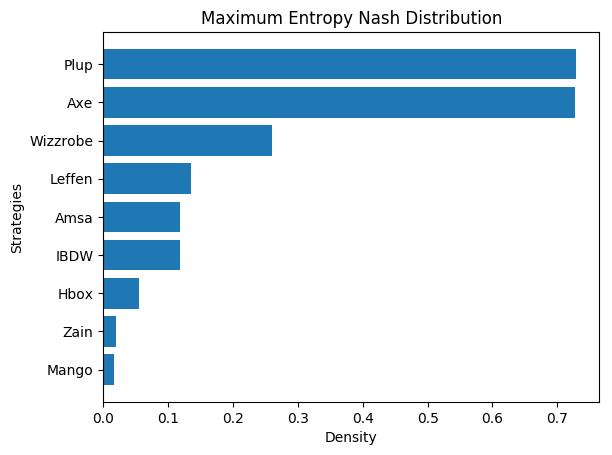



 57%|█████▋    | 57/100 [00:29<00:25,  1.72it/s]

Iteration  57


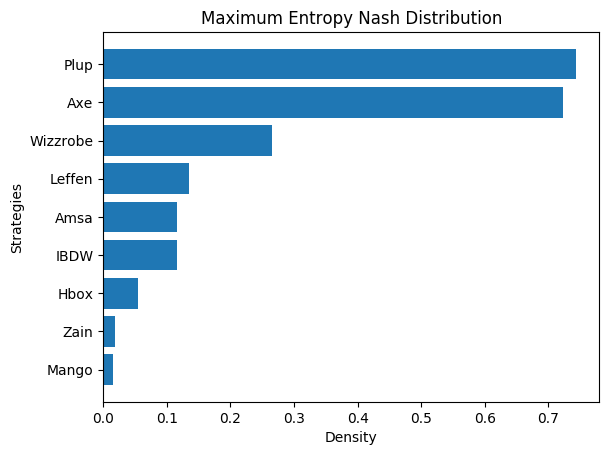



 58%|█████▊    | 58/100 [00:30<00:24,  1.72it/s]

Iteration  58


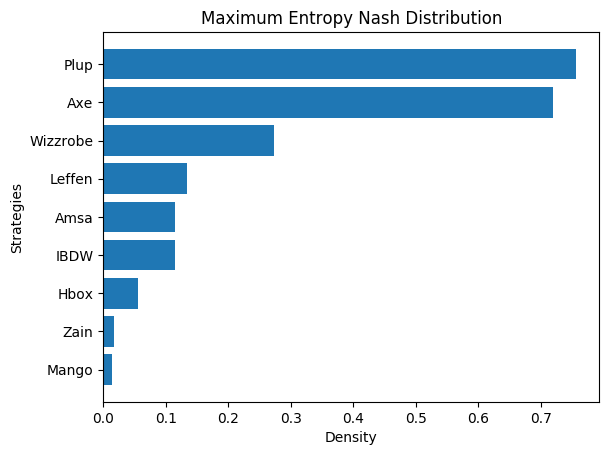



 59%|█████▉    | 59/100 [00:30<00:22,  1.83it/s]

Iteration  59


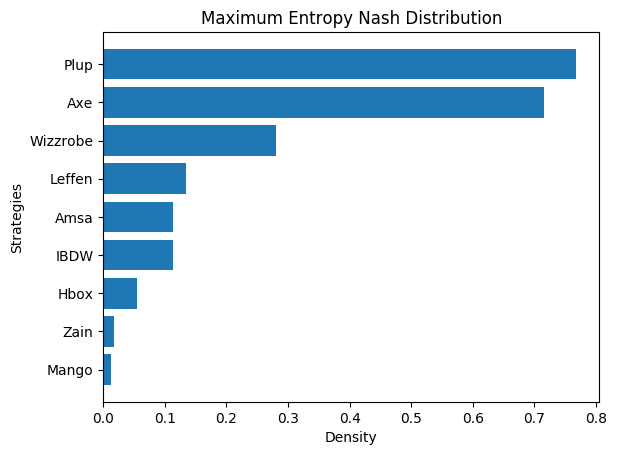



 60%|██████    | 60/100 [00:31<00:20,  1.92it/s]

Iteration  60


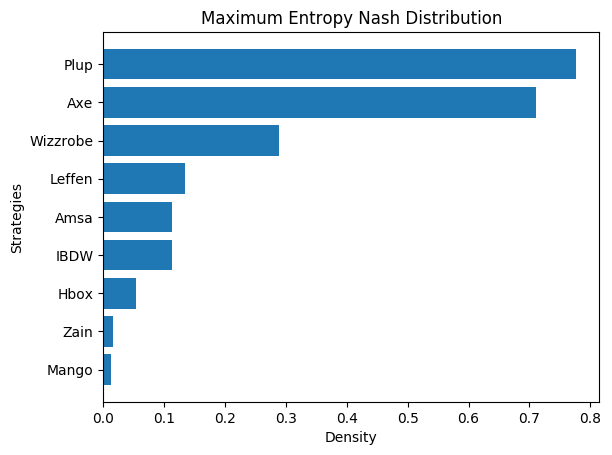



 61%|██████    | 61/100 [00:31<00:19,  1.99it/s]

Iteration  61


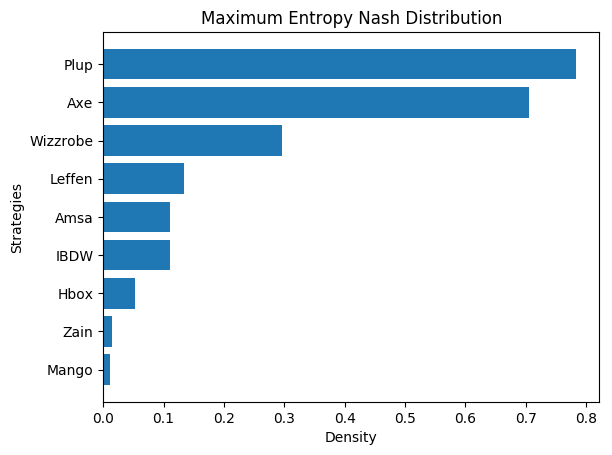



 62%|██████▏   | 62/100 [00:32<00:19,  1.97it/s]

Iteration  62


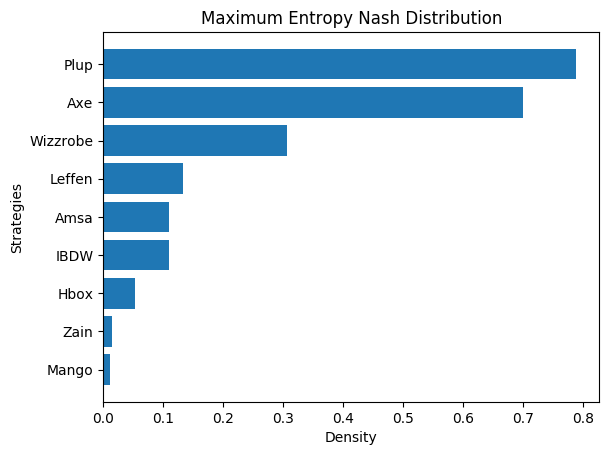



 63%|██████▎   | 63/100 [00:32<00:18,  1.95it/s]

Iteration  63


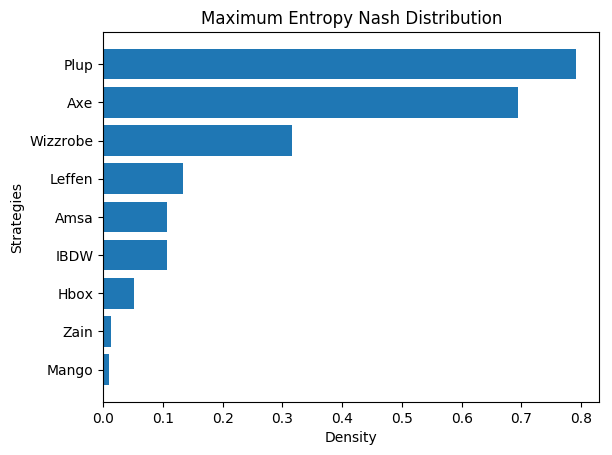



 64%|██████▍   | 64/100 [00:33<00:18,  1.94it/s]

Iteration  64


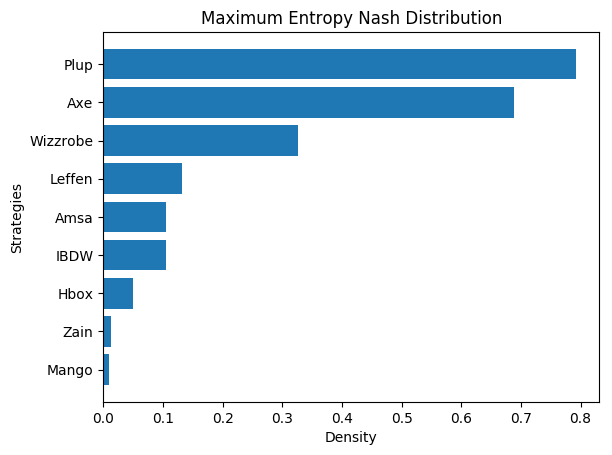



 65%|██████▌   | 65/100 [00:34<00:18,  1.87it/s]

Iteration  65


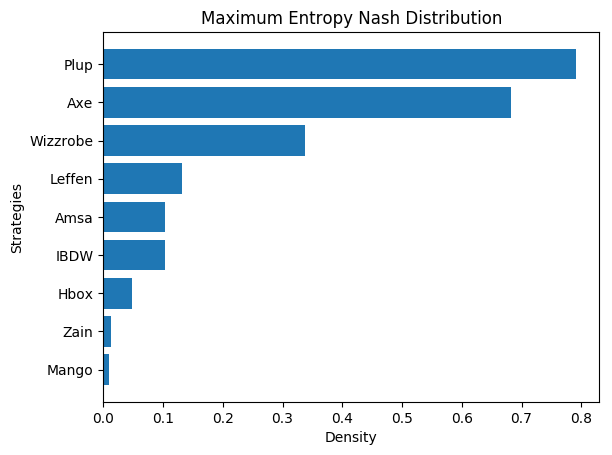



 66%|██████▌   | 66/100 [00:34<00:18,  1.88it/s]

Iteration  66


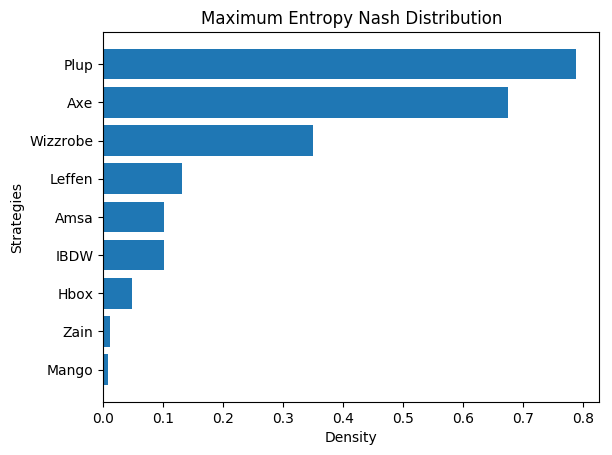



 67%|██████▋   | 67/100 [00:34<00:16,  2.01it/s]

Iteration  67


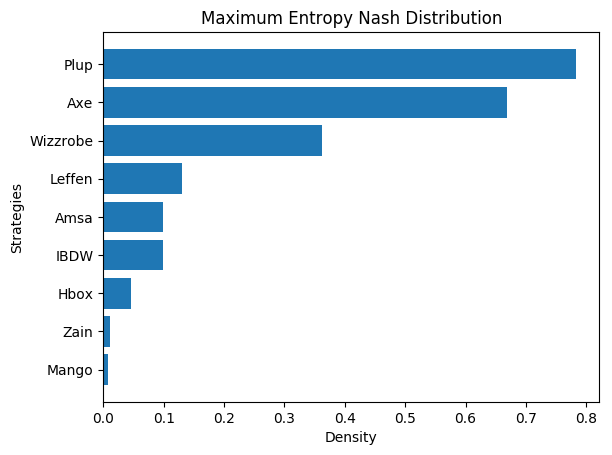



 68%|██████▊   | 68/100 [00:35<00:15,  2.04it/s]

Iteration  68


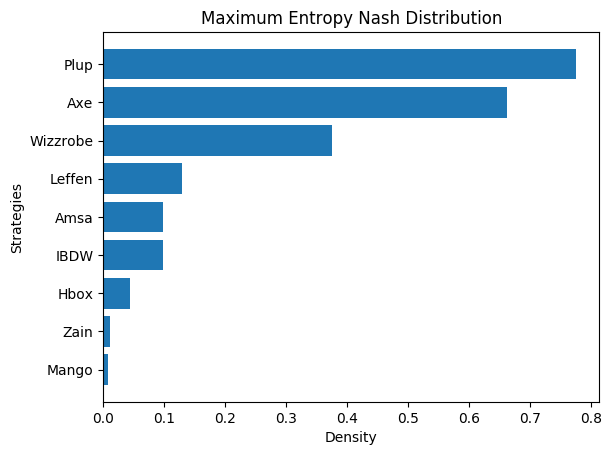



 69%|██████▉   | 69/100 [00:35<00:14,  2.10it/s]

Iteration  69


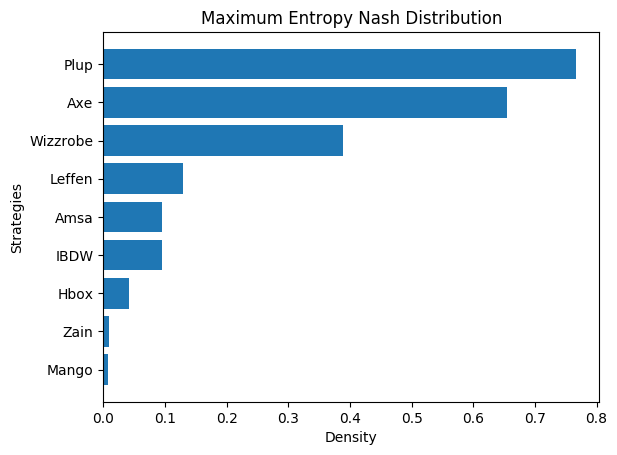



 70%|███████   | 70/100 [00:36<00:13,  2.17it/s]

Iteration  70


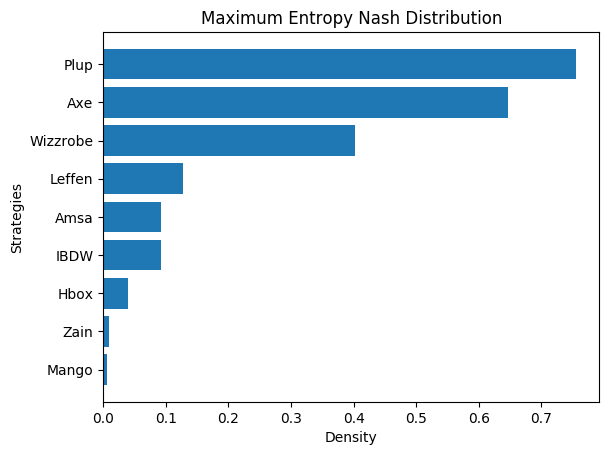



 71%|███████   | 71/100 [00:36<00:12,  2.23it/s]

Iteration  71


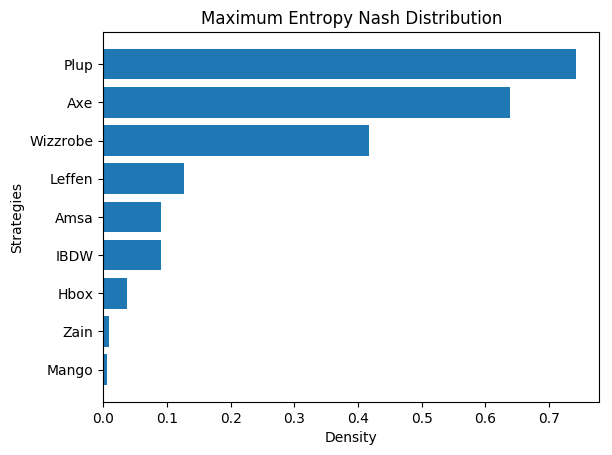



 72%|███████▏  | 72/100 [00:37<00:12,  2.26it/s]

Iteration  72


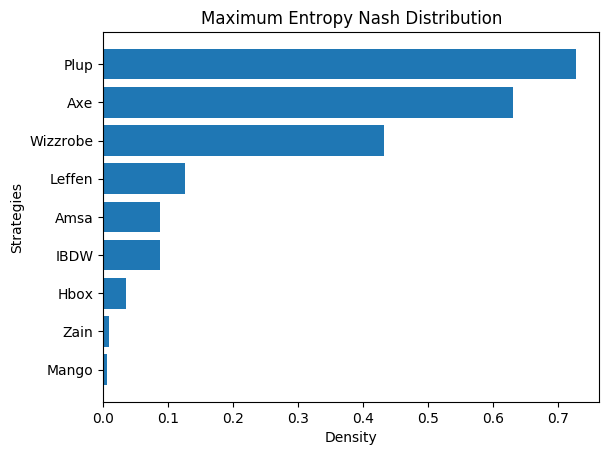



 73%|███████▎  | 73/100 [00:37<00:11,  2.28it/s]

Iteration  73


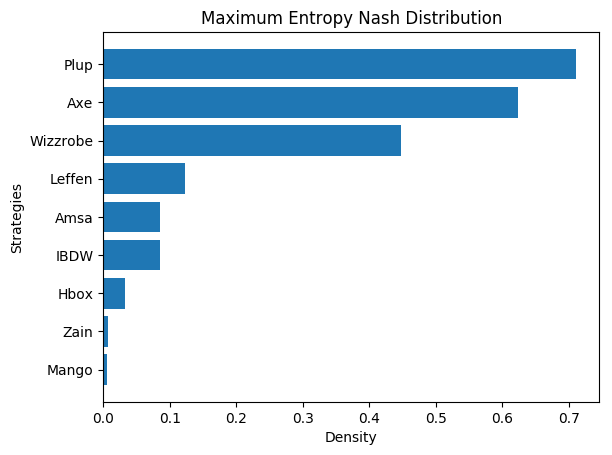



 74%|███████▍  | 74/100 [00:38<00:11,  2.23it/s]

Iteration  74


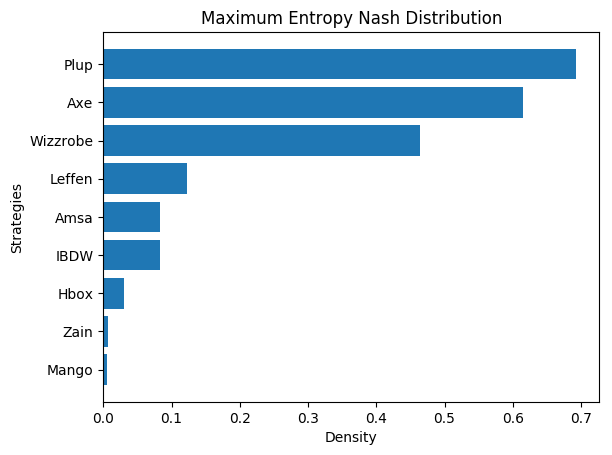



 75%|███████▌  | 75/100 [00:38<00:11,  2.26it/s]

Iteration  75


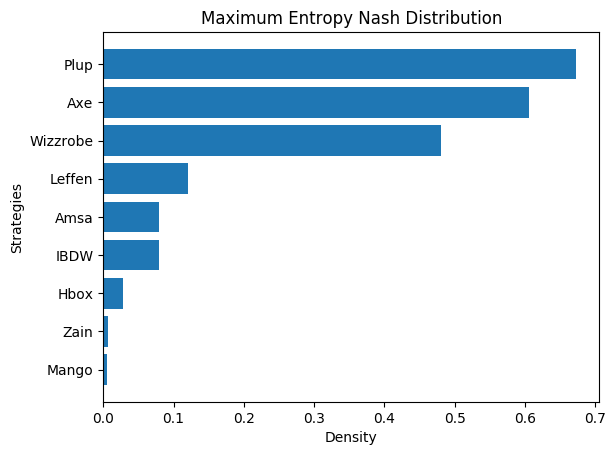



 76%|███████▌  | 76/100 [00:38<00:10,  2.30it/s]

Iteration  76


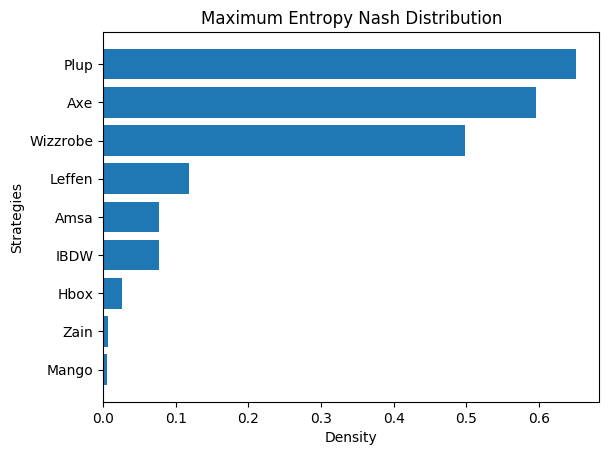



 77%|███████▋  | 77/100 [00:39<00:09,  2.33it/s]

Iteration  77


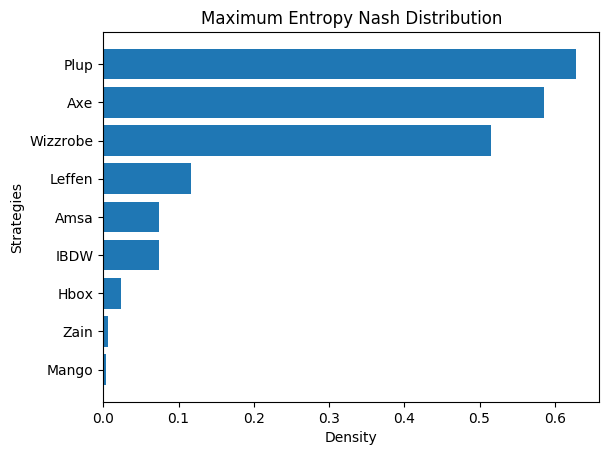



 78%|███████▊  | 78/100 [00:39<00:09,  2.26it/s]

Iteration  78


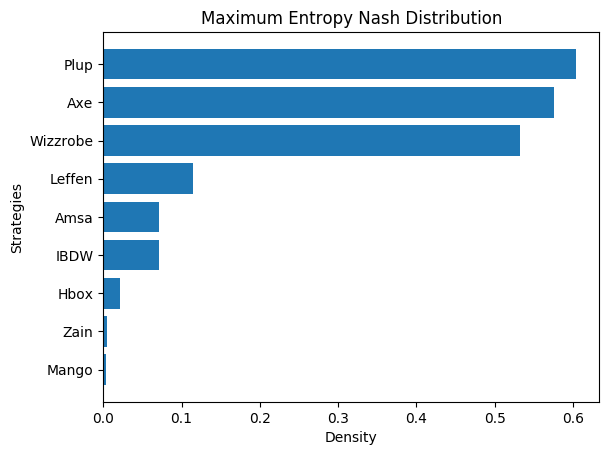



 79%|███████▉  | 79/100 [00:40<00:09,  2.27it/s]

Iteration  79


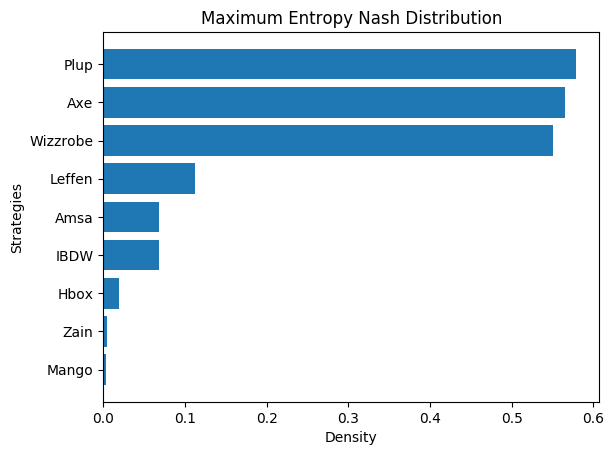



 80%|████████  | 80/100 [00:40<00:08,  2.30it/s]

Iteration  80


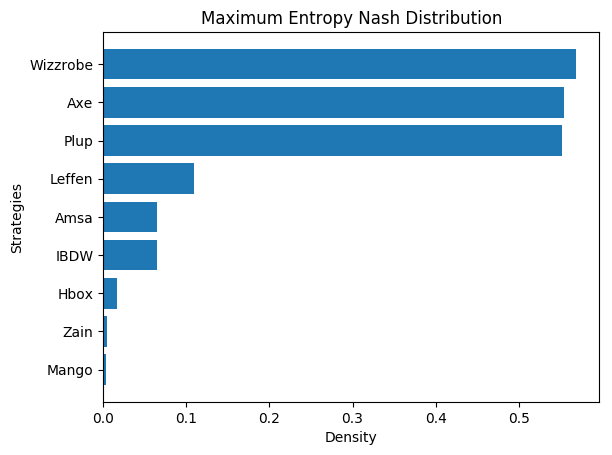



 81%|████████  | 81/100 [00:41<00:08,  2.34it/s]

Iteration  81


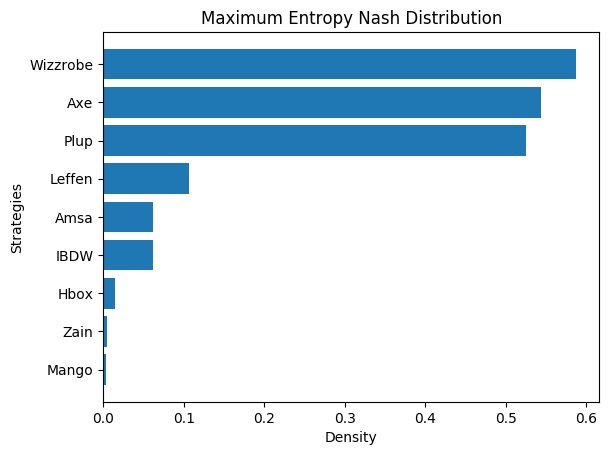



 82%|████████▏ | 82/100 [00:41<00:07,  2.36it/s]

Iteration  82


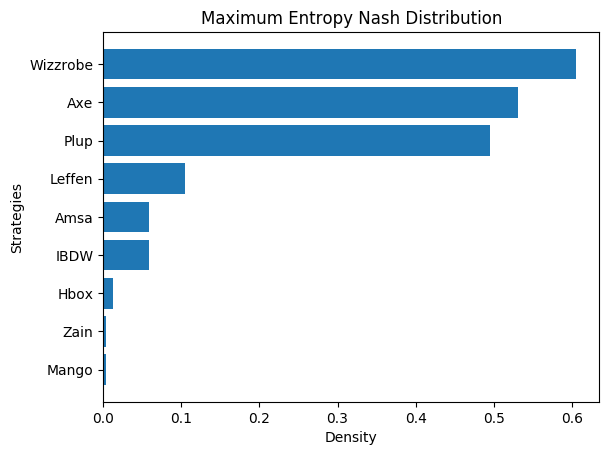



 83%|████████▎ | 83/100 [00:41<00:07,  2.36it/s]

Iteration  83


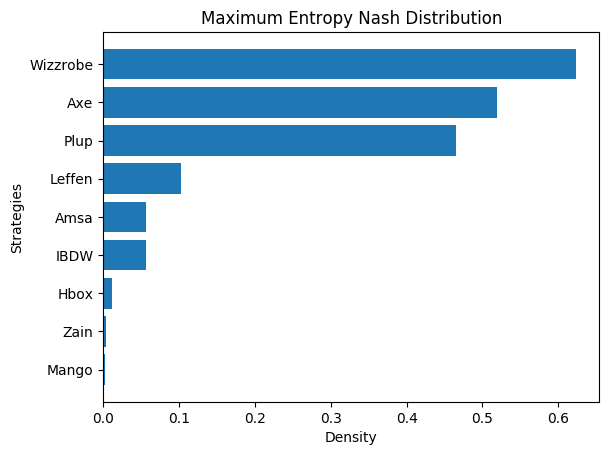



 84%|████████▍ | 84/100 [00:42<00:06,  2.37it/s]

Iteration  84


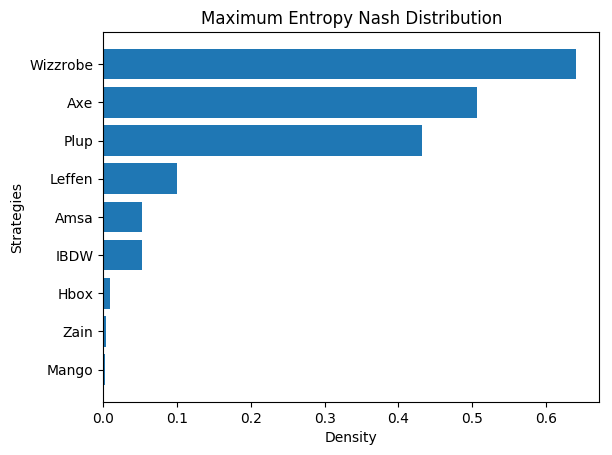



 85%|████████▌ | 85/100 [00:42<00:06,  2.29it/s]

Iteration  85


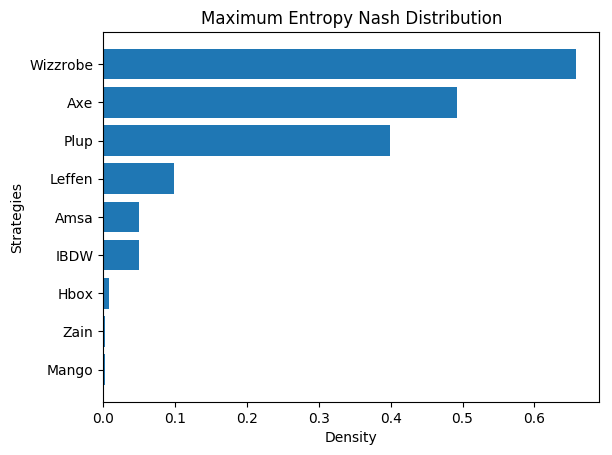



 86%|████████▌ | 86/100 [00:43<00:06,  2.32it/s]

Iteration  86


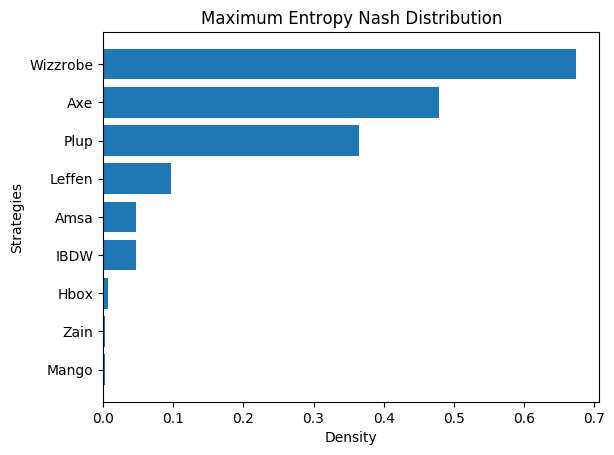



 87%|████████▋ | 87/100 [00:43<00:05,  2.35it/s]

Iteration  87


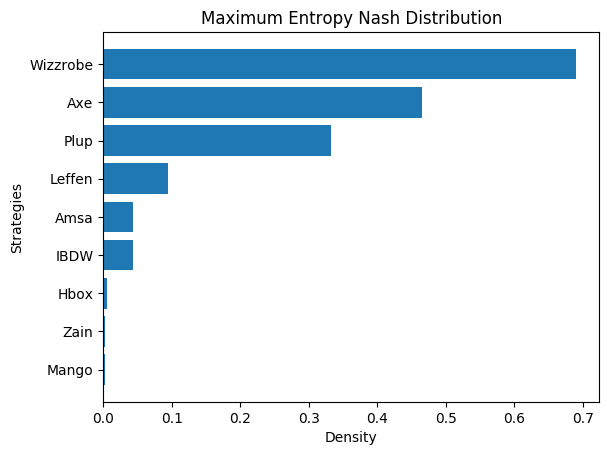



 88%|████████▊ | 88/100 [00:44<00:05,  2.35it/s]

Iteration  88


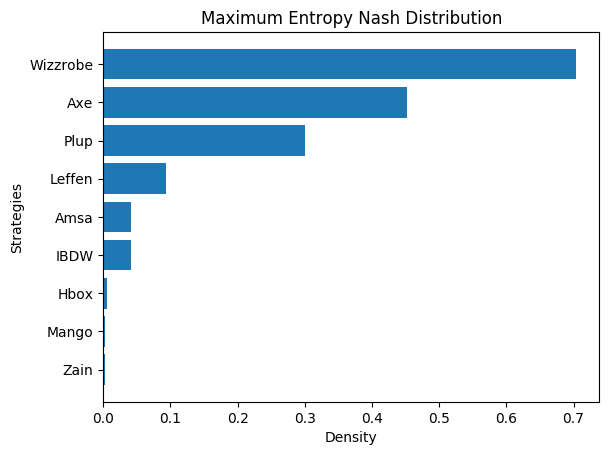



 89%|████████▉ | 89/100 [00:44<00:04,  2.37it/s]

Iteration  89


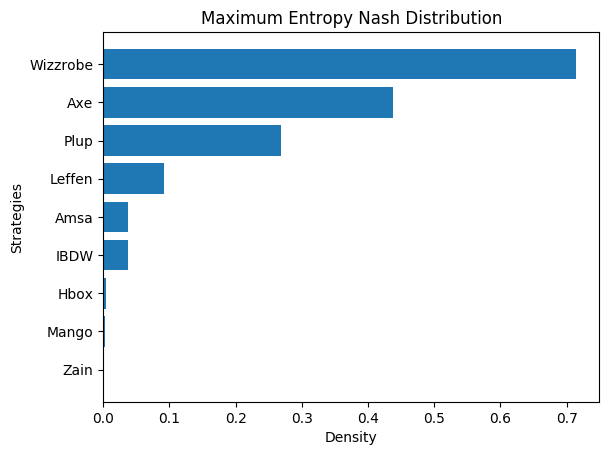



 90%|█████████ | 90/100 [00:44<00:04,  2.36it/s]

Iteration  90


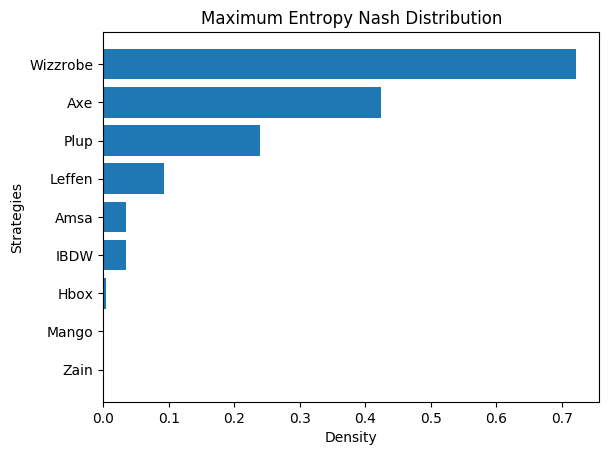



 91%|█████████ | 91/100 [00:45<00:03,  2.33it/s]

Iteration  91


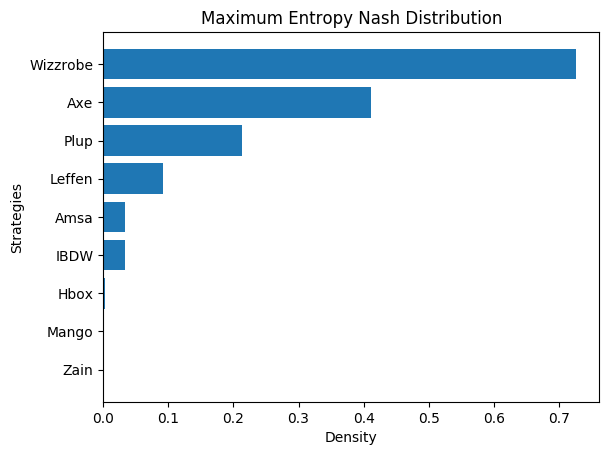



 92%|█████████▏| 92/100 [00:45<00:03,  2.34it/s]

Iteration  92


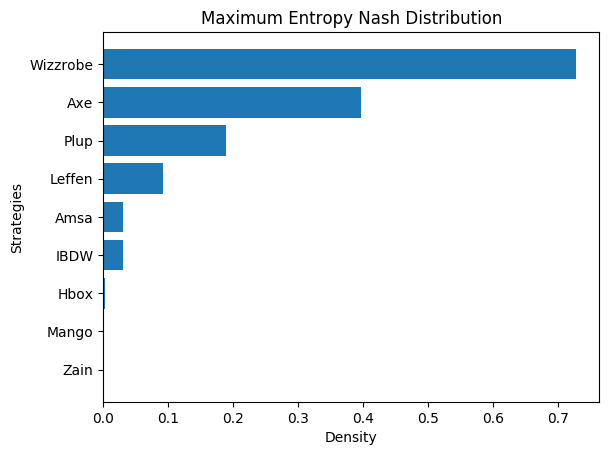



 93%|█████████▎| 93/100 [00:46<00:03,  2.33it/s]

Iteration  93


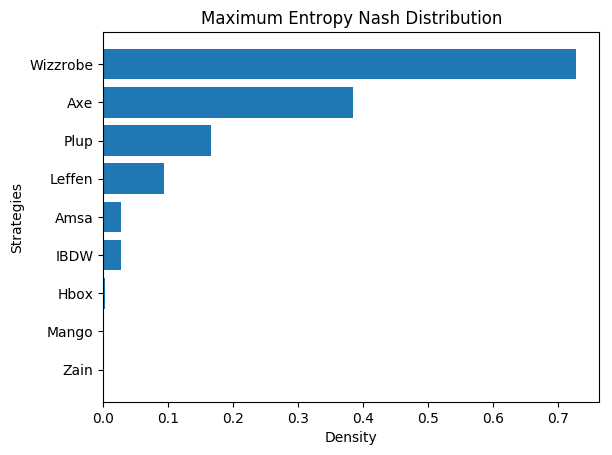



 94%|█████████▍| 94/100 [00:46<00:02,  2.34it/s]

Iteration  94


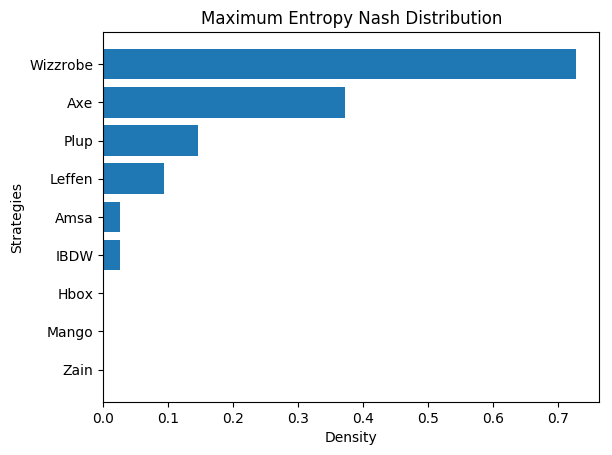



 95%|█████████▌| 95/100 [00:47<00:02,  2.35it/s]

Iteration  95


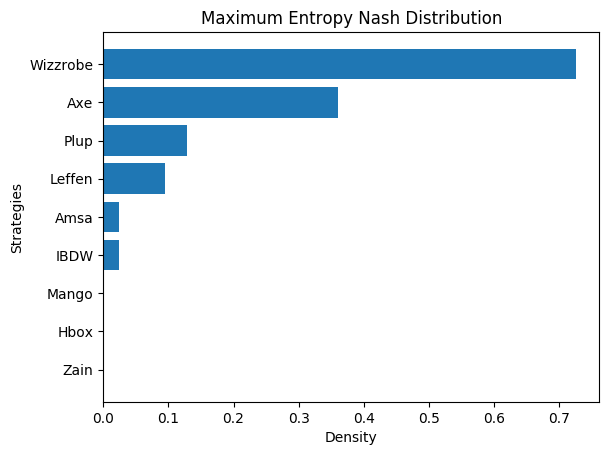



 96%|█████████▌| 96/100 [00:47<00:01,  2.12it/s]

Iteration  96


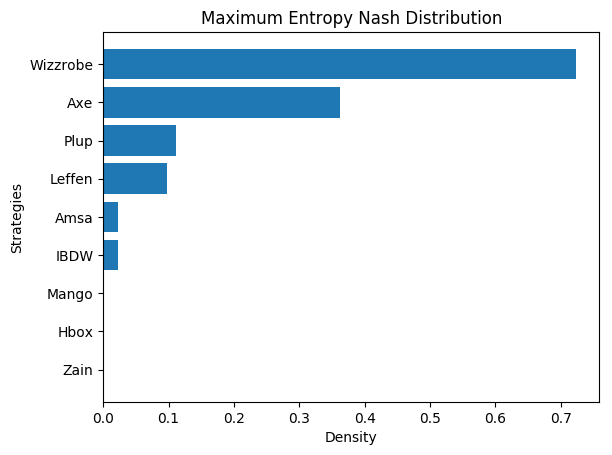



 97%|█████████▋| 97/100 [00:48<00:01,  1.98it/s]

Iteration  97


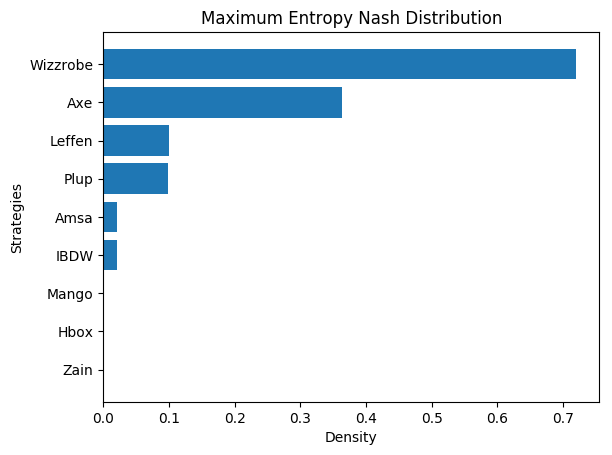



 98%|█████████▊| 98/100 [00:48<00:01,  1.91it/s]

Iteration  98


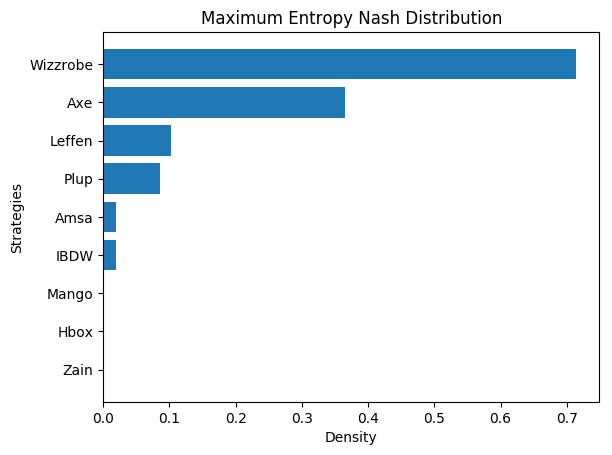



 99%|█████████▉| 99/100 [00:49<00:00,  1.96it/s]

Iteration  99


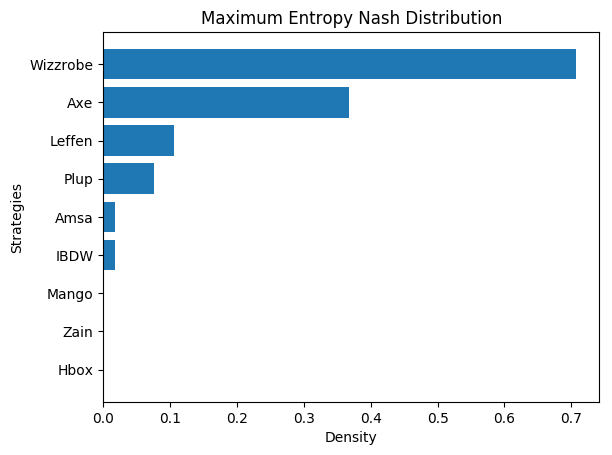



100%|██████████| 100/100 [00:49<00:00,  1.91it/s]

In [75]:
#We will generate our dual variables.. intialize them to 0 and attempt to constuct
#a mixed strategy from it
#We will generate our dual variables.. intialize them to 0 and attempt to constuct
#a mixed strategy from it
du = {}
joint = []
for i in range(len(action_space)):
    for j in range(len(action_space)):
        if j > i:
            #Since this is a meta_game, both players cannot select the same strategy (may not apply to all games)
            joint_action = (action_space[i], action_space[j])
            joint.append(joint_action)
            du[joint_action] = 0
        
log_grad_descent(du, verbose=True, rounds=100)

In [76]:
probs = {}
for action in action_space:
    probs[action] = P(du,action)
    print(action, ": ", P(du, action))

Hbox :  0.0005029960190624551
Leffen :  0.10521631835668603
Wizzrobe :  0.7064262424274673
Mango :  0.0008245186602828165
Axe :  0.3668273263117804
Zain :  0.0005541320843607976
Plup :  0.07631036754490818
IBDW :  0.01737557035306989
Amsa :  0.01737557035306989


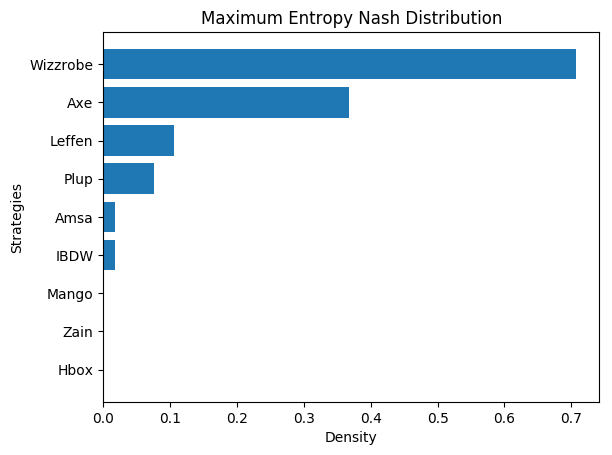

In [77]:
plot(du)